# PhonePe Pulse Business Analysis Project

#### Name: Siddhant Iyer

#### Project Type: Business Analytics

### Project Overview 

With digital payments rapidly becoming the default for everyday transactions, especially on platforms like PhonePe, there is a growing need to deeply understand transaction behavior, user engagement, and insurance activity. 

This project focuses on analyzing and visualizing aggregated metrics across three key domains—Transactions, Insurance, and Users—to uncover meaningful patterns at varying levels. It also incorporates five focused business case studies that examine trends, patterns, derive actionable insights, and propose targeted recommendations to help improve service quality, enhance user engagement, and guide strategic decision‑making.

The goal is to create an interactive multi-page Streamlit dashboard which will incorporate all these elements and will be modeled upon the PhonePe Pulse dashboard: https://www.phonepe.com/pulse/explore/transaction/2024/1/.

At the end of the project, users will be able to navigate between the pages, explore data on their own for different year and quarter combinations, view domain summaries and be able to choose different business case studies and generate detailed reports - all in one intuitive interface.

### Importing the Data from GitHub

#### Checking the Python Version

In [1]:
import sys
print ("Python version:",sys.version)

Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


#### Cloning the GitHub Repository

In [ ]:
from git import Repo

repo_url = "https://github.com/PhonePe/pulse" # url for the github repository
destination = "/content/PhonePePulse" # where the file will be stored

Repo.clone_from(repo_url,destination) 

#### Checking the current working directory

In [2]:
import os
print(os.getcwd())

C:\Users\Siddhant Iyer\pulse


#### Checking whether the folder exists in the current working directory

In [3]:
import os

# Checking if the path to the GitHub folder exists in the working directory
git_path = r"C:\Users\Siddhant Iyer\pulse\data"

if os.path.exists(git_path):
    print("Git repo folder exists!")
else:
    print("Git repo folder not found!")

Git repo folder exists!


### 1. Creating the Aggregate Transaction DataFrame

In [4]:
import os
path = r"data/aggregated/transaction/country/india/state" # path to the aggregated transaction folder which contains all the states and regions
agg_state_list = os.listdir(path) 
agg_state_list

['andaman-&-nicobar-islands',
 'andhra-pradesh',
 'arunachal-pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra-&-nagar-haveli-&-daman-&-diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal-pradesh',
 'jammu-&-kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya-pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil-nadu',
 'telangana',
 'tripura',
 'uttar-pradesh',
 'uttarakhand',
 'west-bengal']

In [5]:
import json
import pandas as pd

In [6]:
clm_agg_trans = {'State': [], 'Year': [], 'Quarter': [], 'Transaction_type': [], 'Transaction_count': [], 
           'Transaction_amount': []} # column names for the agg_trans table

In [7]:
for i in agg_state_list:
    p_i = os.path.join(path, i) # full path for a state 
    agg_yr = os.listdir(p_i) # list of years available for this state

    # loop through each year folder for the current state 
    for j in agg_yr: 
        p_j = os.path.join(p_i, j) # full path for a specific year of a state 
        agg_yr_list = os.listdir(p_j) # list of quarter JSON files 

        # list through each quarter file for the current year
        for k in agg_yr_list: 
            p_k = os.path.join(p_j, k) # full path to the specific quarter JSON
            with open(p_k, 'r') as Data:
                A = json.load(Data) # load JSON content as a dictionary 

            # Check structure to avoid KeyError and proceed only if keys are present 
            if 'data' in A and 'transactionData' in A['data']:
                for z in A['data']['transactionData']: # iterate over each transaction type in the file
                    Name = z['name'] # transaction category 
                    count = z['paymentInstruments'][0]['count'] # number of transactions 
                    amount = z['paymentInstruments'][0]['amount'] # total transaction value 

                    # append extracted values to the aggregated column dictionary
                    clm_agg_trans['Transaction_type'].append(Name)
                    clm_agg_trans['Transaction_count'].append(count)
                    clm_agg_trans['Transaction_amount'].append(amount)
                    clm_agg_trans['State'].append(i)
                    clm_agg_trans['Year'].append(j)
                    clm_agg_trans['Quarter'].append(int(k.strip('.json')))

In [8]:
# converting the created table into a DataFrame
agg_trans = pd.DataFrame(clm_agg_trans)
display(agg_trans.head())
display(agg_trans.shape)

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05


(5034, 6)

### 2. Creating Aggregate Insurance DataFrame

In [9]:
import os
# path to the aggregated insurance folder which contains all the states and regions
path = r"data/aggregated/insurance/country/india/state"
agg_state_list_in = os.listdir(path)

In [10]:
clm_agg_in = {'State': [], 'Year': [], 'Quarter': [], 'Insurance_type': [], 'Insurance_count': [],
           'Insurance_amount': []} # column names for the agg_ins table

In [11]:
for i in agg_state_list_in:
    p_i = os.path.join(path, i) # looks at each state folder within the aggregated insurance directory
    agg_yr = os.listdir(p_i) # Lists all year folders within that state

    for j in agg_yr:
        p_j = os.path.join(p_i, j) # sets path to the year specific folder
        agg_yr_list = os.listdir(p_j) # lists all the json files (quarters) in the year folder

        for k in agg_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter
            with open(p_k, 'r') as Data:
                B = json.load(Data) # loads the json content into python

            # Checks if the JSON structure has the expected keys to avoid errors
            if 'data' in B and 'transactionData' in B['data']:
                for z in B['data']['transactionData']:
                    Name = z['name'] # get the insurance type name
                    count = z['paymentInstruments'][0]['count'] # count for the payment category
                    amount = z['paymentInstruments'][0]['amount'] # amount of the payment category

                    clm_agg_in['Insurance_type'].append(Name) # append transaction type to the list
                    clm_agg_in['Insurance_count'].append(count) # append insurance count to the list
                    clm_agg_in['Insurance_amount'].append(amount) # append insurance amount to the list
                    clm_agg_in['State'].append(i) # current state
                    clm_agg_in['Year'].append(j) # current year
                    clm_agg_in['Quarter'].append(int(k.strip('.json'))) # current quarter

In [12]:
# converting the created table into a DataFrame 
agg_ins = pd.DataFrame(clm_agg_in)
display(agg_ins.head())
display(agg_ins.shape)

,State,Year,Quarter,Insurance_type,Insurance_count,Insurance_amount
0,andaman-&-nicobar-islands,2020,2,Insurance,6,1360.0
1,andaman-&-nicobar-islands,2020,3,Insurance,41,15380.0
2,andaman-&-nicobar-islands,2020,4,Insurance,124,157975.0
3,andaman-&-nicobar-islands,2021,1,Insurance,225,244266.0
4,andaman-&-nicobar-islands,2021,2,Insurance,137,181504.0


(682, 6)

### 3. Creating the Aggregate User DataFrame

In [13]:
# path to the aggregated user folder which contains all the states and regions
path = r"data/aggregated/user/country/india/state"
agg_state_list_user = os.listdir(path)

In [14]:
clm_agg_user = {'State': [], 'Year': [], 'Quarter': [], 'Brand_name': [], 'User_count': [],
           'Percentage_of_users': []}

In [15]:
for i in agg_state_list_user:
    p_i = os.path.join(path, i) # looks at each state folder within the aggregated user directory
    agg_yr = os.listdir(p_i) # Lists all year folders within that state

    for j in agg_yr:
        p_j = os.path.join(p_i, j) # sets path to the year specific folder
        agg_yr_list = os.listdir(p_j) # lists all the json files (quarters) in the year folder

        for k in agg_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter
            with open(p_k, 'r') as Data:
                C = json.load(Data) # loads the json content into python

            # Checks if the JSON structure has the expected keys to avoid errors and if usersByDevice is not None
            if 'data' in C and 'usersByDevice' in C['data'] and C['data']['usersByDevice'] is not None:
                for z in C['data']['usersByDevice']:
                    brand = z['brand']
                    count = z['count'] # count for the payment category
                    percentage = z['percentage'] # amount of the payment category

                    clm_agg_user['Brand_name'].append(brand) # append transaction type to the list
                    clm_agg_user['User_count'].append(count) # append insurance count to the list
                    clm_agg_user['Percentage_of_users'].append(percentage) # append insurance amount to the list
                    clm_agg_user['State'].append(i) # current state
                    clm_agg_user['Year'].append(j) # current year
                    clm_agg_user['Quarter'].append(int(k.strip('.json'))) # current quarter

In [16]:
# converting the clm_agg_user table into a DataFrame
agg_user = pd.DataFrame(clm_agg_user)
display(agg_user.head())
display(agg_user.shape)

,State,Year,Quarter,Brand_name,User_count,Percentage_of_users
0,andaman-&-nicobar-islands,2018,1,Xiaomi,1665,0.247033
1,andaman-&-nicobar-islands,2018,1,Samsung,1445,0.214392
2,andaman-&-nicobar-islands,2018,1,Vivo,982,0.145697
3,andaman-&-nicobar-islands,2018,1,Oppo,501,0.074332
4,andaman-&-nicobar-islands,2018,1,OnePlus,332,0.049258


(6732, 6)

### 4. Creating the Map Transaction DataFrame 

In [17]:
# path to the map transaction folder which contains all the states and regions
path = r"data/map/transaction/hover/country/india/state"
map_state_trans = os.listdir(path)

In [18]:
clm_map_trans = {'State': [], 'Year': [], 'Quarter': [], 'District_name': [], 'Transaction_count': [],
           'Transaction_amount': []}

In [19]:
for i in map_state_trans:
    p_i = os.path.join(path, i) # Looks at each folder within the map transaction folder
    map_yr = os.listdir(p_i) # Lists all year folders within the state

    for j in map_yr:
        p_j = os.path.join(p_i, j) # Lists path to the specific year folder 
        map_yr_list = os.listdir(p_j) # Lists all the JSON files (quarters) in the year folder

        for k in map_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter
            with open(p_k, 'r') as Data: 
                D = json.load(Data) # loads the specific JSON file

            # Check structure to avoid KeyError
            if 'data' in D and 'hoverDataList' in D['data']:
                for z in D['data']['hoverDataList']:
                    Name = z['name']
                    count = z['metric'][0]['count'] # counting the number of transactions 
                    amount = z['metric'][0]['amount'] # total amount of transactions 

                    clm_map_trans['District_name'].append(Name)
                    clm_map_trans['Transaction_count'].append(count)
                    clm_map_trans['Transaction_amount'].append(amount)
                    clm_map_trans['State'].append(i)
                    clm_map_trans['Year'].append(j)
                    clm_map_trans['Quarter'].append(int(k.strip('.json')))

In [20]:
# Converting the clm_map_trans table into a DataFrame
map_trans = pd.DataFrame(clm_map_trans)
display(map_trans.head())
display(map_trans.shape)

,State,Year,Quarter,District_name,Transaction_count,Transaction_amount
0,andaman-&-nicobar-islands,2018,1,north and middle andaman district,442,9.316631e+05
1,andaman-&-nicobar-islands,2018,1,south andaman district,5688,1.256025e+07
2,andaman-&-nicobar-islands,2018,1,nicobars district,528,1.139849e+06
3,andaman-&-nicobar-islands,2018,2,north and middle andaman district,825,1.317863e+06
4,andaman-&-nicobar-islands,2018,2,south andaman district,9395,2.394824e+07


(20604, 6)

### 5. Creating Map Insurance DataFrame

In [21]:
# path to the map insurance folder which contains all the states and regions
path = r"data/map/insurance/hover/country/india/state"
map_state_ins = os.listdir(path)

In [22]:
clm_map_ins = {'State': [], 'Year': [], 'Quarter': [], 'District_name': [], 'Insurance_count': [],
           'Insurance_amount': []}

In [23]:
for i in map_state_ins:
    p_i = os.path.join(path, i) # looks at each state folder within the map insurance directory
    map_yr = os.listdir(p_i) # Lists all year folders within that state

    for j in map_yr:
        p_j = os.path.join(p_i, j) # sets path to the year specific folder
        map_yr_list = os.listdir(p_j) # lists all the json files (quarters) in the year folder

        for k in map_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter
            with open(p_k, 'r') as Data:
                E = json.load(Data) # loads the json content into python

            # Checks if the JSON structure has the expected keys to avoid errors and if hoverDataList is not None or empty
            if 'data' in E and 'hoverDataList' in E['data'] and E['data']['hoverDataList']:
                for z in E['data']['hoverDataList']:
                    Name = z['name']
                    # Check if 'metric' key exists and is not empty
                    if 'metric' in z and z['metric']:
                        count = z['metric'][0]['count']
                        amount = z['metric'][0]['amount']
                    else:
                        # Append default values if 'metric' is missing or empty
                        count = None
                        amount = None

                    clm_map_ins['District_name'].append(Name) # append district name to the list
                    clm_map_ins['Insurance_count'].append(count) # append insurance count to the list
                    clm_map_ins['Insurance_amount'].append(amount) # append insurance amount to the list
                    clm_map_ins['State'].append(i) # current state
                    clm_map_ins['Year'].append(j) # current year
                    clm_map_ins['Quarter'].append(int(k.strip('.json'))) # current quarter
            else:
                # If 'hoverDataList' is missing or empty, append None or default values to maintain equal list lengths
                clm_map_ins['District_name'].append(None)
                clm_map_ins['Insurance_count'].append(None)
                clm_map_ins['Insurance_amount'].append(None)
                clm_map_ins['State'].append(i)
                clm_map_ins['Year'].append(j)
                clm_map_ins['Quarter'].append(int(k.strip('.json')))

In [24]:
map_ins = pd.DataFrame(clm_map_ins)
display(map_ins.head())
display(map_ins.shape)

,State,Year,Quarter,District_name,Insurance_count,Insurance_amount
0,andaman-&-nicobar-islands,2020,2,south andaman district,3.0,795.0
1,andaman-&-nicobar-islands,2020,2,nicobars district,3.0,565.0
2,andaman-&-nicobar-islands,2020,3,north and middle andaman district,1.0,281.0
3,andaman-&-nicobar-islands,2020,3,south andaman district,35.0,13651.0
4,andaman-&-nicobar-islands,2020,3,nicobars district,5.0,1448.0


(13878, 6)

### 6. Creating Map User DataFrame

In [25]:
# path to the map user folder which contains all the states and regions
path = r"data/map/user/hover/country/india/state"
map_state_user = os.listdir(path)

In [26]:
clm_map_user = {'State': [], 'Year': [], 'Quarter': [], 'District_name': [], 'Registered_users': [],
           'Number_of_app_opens': []}

In [27]:
for i in map_state_user:
    p_i = os.path.join(path, i) # looks at each state folder within the map user directory
    map_yr = os.listdir(p_i) # Lists all year folders within that state

    for j in map_yr:
        p_j = os.path.join(p_i, j) # sets path to the year specific folder
        map_yr_list = os.listdir(p_j) # lists all the json files (quarters) in the year folder

        for k in map_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter 
            with open(p_k, 'r') as Data: 
                F = json.load(Data) # loads the json content into python

            # Check structure to avoid KeyError
            if 'data' in F and 'hoverData' in F['data'] and F['data']['hoverData'] is not None:
                for district_name, z in F['data']['hoverData'].items():
                    Name = district_name
                    count = z['registeredUsers'] # Number of registered users 
                    amount = z['appOpens'] # Number of app opens 
                    
                    clm_map_user['District_name'].append(Name) # District Name 
                    clm_map_user['Registered_users'].append(count) # Registered Users
                    clm_map_user['Number_of_app_opens'].append(amount) # App Opens
                    clm_map_user['State'].append(i) # State 
                    clm_map_user['Year'].append(j) # Year 
                    clm_map_user['Quarter'].append(int(k.strip('.json'))) # Quarter

In [28]:
map_user = pd.DataFrame(clm_map_user)
display(map_user.head())
display(map_user.shape)

,State,Year,Quarter,District_name,Registered_users,Number_of_app_opens
0,andaman-&-nicobar-islands,2018,1,north and middle andaman district,632,0
1,andaman-&-nicobar-islands,2018,1,south andaman district,5846,0
2,andaman-&-nicobar-islands,2018,1,nicobars district,262,0
3,andaman-&-nicobar-islands,2018,2,north and middle andaman district,911,0
4,andaman-&-nicobar-islands,2018,2,south andaman district,8143,0


(20608, 6)

### 7. Creating Top Transaction DataFrame

In [29]:
# path to the top transaction folder which contains all the states and regions
path = r"data/top/transaction/country/india/state"
top_state_trans = os.listdir(path)

In [30]:
clm_top_trans = {'State': [], 'Pincode': [], 'Year': [], 'Quarter': [], 
                 'Transaction_count': [], 'Transaction_amount': []}

In [31]:
for i in top_state_trans:
    p_i = os.path.join(path, i) # looks at each state folder within the top transaction directory
    top_yr = os.listdir(p_i) # Lists all year folders within that state

    for j in top_yr:
        p_j = os.path.join(p_i, j) # sets path to the year specific folder
        top_yr_list = os.listdir(p_j) # lists all the json files (quarters) in the year folder

        for k in top_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter 
            with open(p_k, 'r') as Data: 
                G = json.load(Data) # loads the json content into python

            # Check structure to avoid KeyError
                for z in G['data']['pincodes']:
                    Name = z["entityName"] # pincode 
                    count = z["metric"]['count'] # transaction count 
                    amount = z['metric']['amount'] # transaction amount  

                    clm_top_trans['Pincode'].append(Name)
                    clm_top_trans['Transaction_count'].append(count)
                    clm_top_trans['Transaction_amount'].append(amount)
                    clm_top_trans['State'].append(i)
                    clm_top_trans['Year'].append(j)
                    clm_top_trans['Quarter'].append(int(k.strip('.json')))

In [32]:
top_trans = pd.DataFrame(clm_top_trans)
display(top_trans.head())
display(top_trans.shape)

,State,Pincode,Year,Quarter,Transaction_count,Transaction_amount
0,andaman-&-nicobar-islands,744101,2018,1,1622,2.769298e+06
1,andaman-&-nicobar-islands,744103,2018,1,1223,2.238042e+06
2,andaman-&-nicobar-islands,744102,2018,1,969,3.519060e+06
3,andaman-&-nicobar-islands,744105,2018,1,685,1.298561e+06
4,andaman-&-nicobar-islands,744104,2018,1,340,1.039715e+06


(9999, 6)

### 8. Creating Top Insurance DataFrame

In [33]:
# path to the top insurance folder which contains all the states and regions
path = r"data/top/insurance/country/india/state"
top_state_ins = os.listdir(path)

In [34]:
clm_top_ins = {'State': [], 'Pincode': [], 'Year': [], 'Quarter': [], 
                 'Insurance_count': [], 'Insurance_amount': []}

In [35]:
for i in top_state_ins:
    p_i = os.path.join(path, i) # looks at each state folder within the top insurance directory
    top_yr = os.listdir(p_i) # Lists all year folders within that state

    for j in top_yr:
        p_j = os.path.join(p_i, j) # sets path to the year specific folder
        top_yr_list = os.listdir(p_j) # lists all the json files (quarters) in the year folder

        for k in top_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter 
            with open(p_k, 'r') as Data:
                H = json.load(Data) # loads the json content into python

            # Check structure to avoid KeyError
                for z in H['data']['pincodes']:
                    Name = z["entityName"] # pincode 
                    count = z["metric"]['count'] # insurance count  
                    amount = z['metric']['amount'] # insurance amount 

                    clm_top_ins['Pincode'].append(Name)
                    clm_top_ins['Insurance_count'].append(count)
                    clm_top_ins['Insurance_amount'].append(amount)
                    clm_top_ins['State'].append(i)
                    clm_top_ins['Year'].append(j)
                    clm_top_ins['Quarter'].append(int(k.strip('.json')))

In [36]:
top_ins = pd.DataFrame(clm_top_ins)
display(top_ins.head())
display(top_ins.shape)

,State,Pincode,Year,Quarter,Insurance_count,Insurance_amount
0,andaman-&-nicobar-islands,744301,2020,2,3,565.0
1,andaman-&-nicobar-islands,744104,2020,2,2,513.0
2,andaman-&-nicobar-islands,744101,2020,2,1,282.0
3,andaman-&-nicobar-islands,744112,2020,3,9,3432.0
4,andaman-&-nicobar-islands,744105,2020,3,7,3948.0


(6668, 6)

### 9. Creating Top User DataFrame

In [37]:
# path to the top user folder which contains all the states and regions
path = r"data/top/user/country/india/state"
top_state_user = os.listdir(path)

In [38]:
clm_top_user = {'State': [], 'Pincode': [], 'Year': [], 'Quarter': [], 
                 'Registered_users':[]}

In [39]:
for i in top_state_user:
    p_i = os.path.join(path, i) # looks at each state folder within the top insurance directory
    top_yr = os.listdir(p_i) # Lists all year folders within that state

    for j in top_yr:
        p_j = os.path.join(p_i, j) # sets path to the year specific folder
        top_yr_list = os.listdir(p_j) # lists all the json files (quarters) in the year folder
 
        for k in top_yr_list:
            p_k = os.path.join(p_j, k) # path to the specific quarter 
            with open(p_k, 'r') as Data:
                I = json.load(Data) # loads the json content into python

            # Check structure to avoid KeyError
                for z in I['data']['pincodes']:
                    Name = z["name"] # pincode 
                    reg_user = z['registeredUsers'] # registered users

                    clm_top_user['Pincode'].append(Name)
                    clm_top_user['Registered_users'].append(count)
                    clm_top_user['State'].append(i)
                    clm_top_user['Year'].append(j)
                    clm_top_user['Quarter'].append(int(k.strip('.json')))

In [40]:
top_user = pd.DataFrame(clm_top_user)
display(top_user.head())
display(top_user.shape)

,State,Pincode,Year,Quarter,Registered_users
0,andaman-&-nicobar-islands,744103,2018,1,574
1,andaman-&-nicobar-islands,744101,2018,1,574
2,andaman-&-nicobar-islands,744105,2018,1,574
3,andaman-&-nicobar-islands,744102,2018,1,574
4,andaman-&-nicobar-islands,744104,2018,1,574


(10000, 5)

### Viewing the Dimensions of all DataFrames

In [41]:
# Viewing the number of records and attributes within each table 
print (agg_trans.shape)
print (agg_ins.shape)
print (agg_user.shape)
print (map_trans.shape)
print (map_ins.shape)
print (map_user.shape)
print (top_ins.shape)
print (top_trans.shape)
print (top_user.shape)

(5034, 6)
(682, 6)
(6732, 6)
(20604, 6)
(13878, 6)
(20608, 6)
(6668, 6)
(9999, 6)
(10000, 5)


### Data Pre-Processing

#### Identifying any missing values

In [42]:
df_list = [agg_trans, agg_ins, agg_user, map_trans, map_ins, map_user, top_ins, top_trans, top_user]

In [43]:
def null_values(df_list): # takes in list of all the tables
    for i, df in enumerate(df_list,1): # for each table
        print (f"\nNull values in DataFrame {i}:")
        print (df.isnull().sum()) # finds the sum of all null values

In [44]:
null_values(df_list)


Null values in DataFrame 1:
State                 0
Year                  0
Quarter               0
Transaction_type      0
Transaction_count     0
Transaction_amount    0
dtype: int64

Null values in DataFrame 2:
State               0
Year                0
Quarter             0
Insurance_type      0
Insurance_count     0
Insurance_amount    0
dtype: int64

Null values in DataFrame 3:
State                  0
Year                   0
Quarter                0
Brand_name             0
User_count             0
Percentage_of_users    0
dtype: int64

Null values in DataFrame 4:
State                 0
Year                  0
Quarter               0
District_name         0
Transaction_count     0
Transaction_amount    0
dtype: int64

Null values in DataFrame 5:
State               0
Year                0
Quarter             0
District_name       2
Insurance_count     2
Insurance_amount    2
dtype: int64

Null values in DataFrame 6:
State                  0
Year                   0
Quarter  

- There are no null values in any of the tables

#### Converting the first letter of each word in a column to uppercase

Columns like State, District_name, Transaction_type have columns with unnecessary characters such as '-' and the values are in lower case but for better visualization

In [45]:
# Creating a capitalize_name function to capitalize the columns within each table wherever applicable 
def capitalize_name(column):
    if isinstance(column,str):
        column = column.replace('-',' ') # replace '-' with space ' '
        column = column.replace('&', '&') # keep & as it is
        column = ' '.join(word.capitalize() for word in column.split()) # capitalize the first letter of each word
    return column

In [46]:
for i in df_list:
    i["State"] = i["State"].apply(capitalize_name) # apply captilization to each State or region name

In [47]:
agg_trans["Transaction_type"] = agg_trans["Transaction_type"].apply(capitalize_name)
agg_trans.head()

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,Andaman & Nicobar Islands,2018,1,Recharge & Bill Payments,4200,1.845307e+06
1,Andaman & Nicobar Islands,2018,1,Peer To Peer Payments,1871,1.213866e+07
2,Andaman & Nicobar Islands,2018,1,Merchant Payments,298,4.525072e+05
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05


In [48]:
map_columns = [map_trans, map_ins, map_user]
for i in map_columns:
    i["District_name"] = i["District_name"].apply(capitalize_name)

#### Data Standarization

- Within the District_name column, there were two district names 'Nicobar district' and 'Nicobars district' and they seem to refer to the same district.
- 'Nicobar district' exists in real life so it is better to replace 'Nicobars' to 'Nicobar' such that they are not treated as two separate values which could impact analysis.

In [49]:
map_trans[map_trans["District_name"].isin(["Nicobar District", "Nicobars District"])].sample(2)

,State,Year,Quarter,District_name,Transaction_count,Transaction_amount
74,Andaman & Nicobar Islands,2024,1,Nicobars District,166796,305346303.0
62,Andaman & Nicobar Islands,2023,1,Nicobars District,94127,202062829.0


In [50]:
# Ensuring that spelling mistakes and discrepancy doesn't affect analysis 
for i in map_columns:
    i["District_name"] = i["District_name"].replace("Nicobars District", "Nicobar District")

In [51]:
map_trans[map_trans["District_name"] == "Nicobar District"].head(4)

,State,Year,Quarter,District_name,Transaction_count,Transaction_amount
2,Andaman & Nicobar Islands,2018,1,Nicobar District,528,1.139849e+06
5,Andaman & Nicobar Islands,2018,2,Nicobar District,1120,3.072437e+06
8,Andaman & Nicobar Islands,2018,3,Nicobar District,1471,6.387829e+06
11,Andaman & Nicobar Islands,2018,4,Nicobar District,1485,7.180859e+06


In [52]:
map_trans[map_trans["District_name"] == "Nicobars District"].head(4) 
# 'Nicobars District' has been successfully converted to Nicobar District

,State,Year,Quarter,District_name,Transaction_count,Transaction_amount


### Converting the DataFrames into CSV Files

In [53]:
# Converting the DataFrames into CSV files in order to use it for analysis
agg_trans.to_csv('agg_trans.csv', index = False)
agg_ins.to_csv('agg_ins.csv', index = False)
agg_user.to_csv('agg_user.csv', index = False)
map_trans.to_csv('map_trans.csv', index = False)
map_ins.to_csv('map_ins.csv', index = False)
map_user.to_csv('map_user.csv', index = False)
top_trans.to_csv('top_trans.csv', index = False)
top_ins.to_csv('top_ins.csv', index = False)
top_user.to_csv('top_user.csv', index = False)

### Connecting with MySQL through SQLAlchemy

In [54]:
!pip install pymysql

In [55]:
# Importing the necessary libraries to connect to the MySQL server and work on the data using SQLAlchemy
import pymysql 
from sqlalchemy import create_engine, text

In [56]:
username = 'root'
password = 'Sid%40SQL2023' # while writing URLs, %40 is used instead of @
host = 'localhost' # host name
port = 3306 # port 
database = 'phonepe_db' # database to connect to in MySQL

try: 
    connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}" # string used to connect to the database
    engine = create_engine(connection_string) # creates an engine object
    print ("Connected successfully to MySQL")

    with engine.connect() as conn: # asks the database for a real engine connection and returns a connection object
        result = conn.execute(text("SELECT DATABASE();")) # executing a sample query to see if it works
        print ("Connected to: ", result.scalar())
    
except Exception as e: # exception handling 
    print (f"Error connecting to the database: {e}") 

Connected successfully to MySQL
Connected to:  phonepe_db


### Creating the Tables for the 9 CSV Files

**Syntax for creating tables using SQL in python**

df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print (f"Table '{table_name}' created successfully from '{csv_file}'")

In [57]:
import pandas as pd

In [58]:
# creating tables for the 9 CSV files and storing it in the phonepe_db database
csv_files = {'agg_trans': r"C:\Users\Siddhant Iyer\pulse\agg_trans.csv",
             'agg_ins': r"C:\Users\Siddhant Iyer\pulse\agg_ins.csv",
             'agg_user': r"C:\Users\Siddhant Iyer\pulse\agg_user.csv",
             'map_trans': r"C:\Users\Siddhant Iyer\pulse\map_trans.csv",
             'map_ins': r"C:\Users\Siddhant Iyer\pulse\map_ins.csv",
             'map_user': r"C:\Users\Siddhant Iyer\pulse\map_user.csv",
             'top_ins': r"C:\Users\Siddhant Iyer\pulse\top_ins.csv",
             'top_trans': r"C:\Users\Siddhant Iyer\pulse\top_trans.csv",
             'top_user': r"C:\Users\Siddhant Iyer\pulse\top_user.csv",}

In [59]:
# iterate through the table names and file paths to see if the table has been successfully created in the database
for table_name, file_path in csv_files.items(): 
    try:
        df = pd.read_csv(file_path)
        df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)
        print (f"Table {table_name} created successfully in {database}")
    except Exception as e:
        print (f"Table {table_name} failed to create successfully: {e}")

Table agg_trans created successfully in phonepe_db
Table agg_ins created successfully in phonepe_db
Table agg_user created successfully in phonepe_db
Table map_trans created successfully in phonepe_db
Table map_ins created successfully in phonepe_db
Table map_user created successfully in phonepe_db
Table top_ins created successfully in phonepe_db
Table top_trans created successfully in phonepe_db
Table top_user created successfully in phonepe_db


#### Verifying if the tables actually exist in the database or not

In [60]:
from sqlalchemy import inspect 
inspector = inspect(engine)
print (f"Tables in {database}, {inspector.get_table_names()}")

Tables in phonepe_db, ['agg_ins', 'agg_trans', 'agg_user', 'map_ins', 'map_trans', 'map_user', 'top_ins', 'top_trans', 'top_user']


#### Writing a sample query to view the table

In [61]:
# A sample query to view the table 
query = text("SELECT * FROM map_trans")

with engine.connect() as conn:
    df = pd.read_sql(query,conn)

display (df)

,State,Year,Quarter,District_name,Transaction_count,Transaction_amount
0,Andaman & Nicobar Islands,2018,1,North And Middle Andaman District,442,9.316631e+05
1,Andaman & Nicobar Islands,2018,1,South Andaman District,5688,1.256025e+07
2,Andaman & Nicobar Islands,2018,1,Nicobar District,528,1.139849e+06
3,Andaman & Nicobar Islands,2018,2,North And Middle Andaman District,825,1.317863e+06
4,Andaman & Nicobar Islands,2018,2,South Andaman District,9395,2.394824e+07
...,...,...,...,...,...,...
20599,West Bengal,2024,4,Alipurduar District,15875637,2.099251e+10
20600,West Bengal,2024,4,Paschim Bardhaman District,56616799,6.968735e+10
20601,West Bengal,2024,4,Nadia District,65274337,1.079320e+11
20602,West Bengal,2024,4,Birbhum District,36905213,5.778701e+10


## Business Case Studies

### 1. Decoding Transaction Dynamics on PhonePe

- PhonePe, a leading digital payments platform, has recently identified significant variations in transaction behavior across states, quarters, and payment categories.
- While some regions and transaction types demonstrate consistent growth, others show stagnation or decline. 
- The leadership team seeks a deeper understanding of these patterns to drive targeted business strategies.

#### a. How has PhonePe’s total transaction volume and value grown over the past years?

In [62]:
query1 = text("""SELECT Year, SUM(Transaction_count) AS 'Total Number of Transactions', 
              SUM(Transaction_amount) AS 'Total Transaction Amount' 
              FROM agg_trans 
              GROUP BY Year 
              ORDER BY Year;""")

with engine.connect() as conn:
    df_trans_value_growth = pd.read_sql(query1, conn)

display(df_trans_value_growth) 

,Year,Total Number of Transactions,Total Transaction Amount
0,2018,1.080202e+09,1.623045e+12
1,2019,4.079827e+09,6.276688e+12
2,2020,7.973975e+09,1.464116e+13
3,2021,1.928843e+10,3.459870e+13
4,2022,3.930129e+10,6.426633e+13
5,2023,6.425705e+10,9.449181e+13
6,2024,9.930343e+10,1.296246e+14


- Calculating the Growth per year 

In [63]:
df_trans_value_growth["Transaction Number Growth (%)"] = df_trans_value_growth["Total Number of Transactions"].pct_change()*100
df_trans_value_growth["Transaction Amount Growth (%)"] = df_trans_value_growth["Total Transaction Amount"].pct_change()*100
display(df_trans_value_growth)

,Year,Total Number of Transactions,Total Transaction Amount,Transaction Number Growth (%),Transaction Amount Growth (%)
0,2018,1.080202e+09,1.623045e+12,NaN,NaN
1,2019,4.079827e+09,6.276688e+12,277.690994,286.722894
2,2020,7.973975e+09,1.464116e+13,95.448834,133.262537
3,2021,1.928843e+10,3.459870e+13,141.892279,136.311160
4,2022,3.930129e+10,6.426633e+13,103.755802,85.747827
5,2023,6.425705e+10,9.449181e+13,63.498574,47.031594
6,2024,9.930343e+10,1.296246e+14,54.540907,37.180724


In [64]:
# converting the NaN values to 0.00
df_trans_value_growth.fillna(0, inplace = True)
display(df_trans_value_growth)

,Year,Total Number of Transactions,Total Transaction Amount,Transaction Number Growth (%),Transaction Amount Growth (%)
0,2018,1.080202e+09,1.623045e+12,0.000000,0.000000
1,2019,4.079827e+09,6.276688e+12,277.690994,286.722894
2,2020,7.973975e+09,1.464116e+13,95.448834,133.262537
3,2021,1.928843e+10,3.459870e+13,141.892279,136.311160
4,2022,3.930129e+10,6.426633e+13,103.755802,85.747827
5,2023,6.425705e+10,9.449181e+13,63.498574,47.031594
6,2024,9.930343e+10,1.296246e+14,54.540907,37.180724


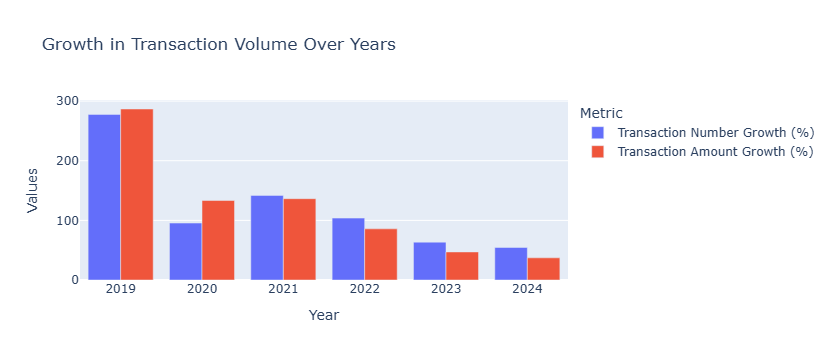

In [208]:
# Creating a box plot
import plotly.express as px 
df_trans_value_growth_fil = df_trans_value_growth[df_trans_value_growth["Year"]!=2018]
fig1 = px.bar(df_trans_value_growth_fil, x = "Year", y = ["Transaction Number Growth (%)","Transaction Amount Growth (%)"],
             barmode = "group", labels = {"value":"Values", "variable":"Metric", "Year":"Year"}, 
             title = "Growth in Transaction Volume Over Years",
             color_discrete_sequence = ["#636EFA","#EF553B"]) # different colors for different bars 

fig1.update_xaxes(tickmode = "array", tickvals = [2019, 2020, 2021, 2022, 2023, 2024], 
                  ticktext = ["2019","2020","2021","2022","2023","2024"])
fig1.update_yaxes(tickformat = ",")
fig1.show()

**Observations**

- The percentage growth in number of transactions has decreased from 2019 to 2024 overall from 277.69% to 54.54%
- The same can be said for the total transaction amount each year as it has decreased from 2019 to 2024 from 286.72% to 37.18%.
- The growth for both metrics peaked in 2019
- However, after the drastic drop in growth, the company saw a growth in transaction volume in 2021, both in terms of the number of transactions made (from 95.4% to 141.89%) and in the total amount in transactions (from 133.26% to 136.31%, before decreasing over the years again.

**Analysis**

- Market Saturation - Initial rapid adoption after launch (peak growth in 2019), leading to market saturation in key regions, causing natural slowdown in growth rates over time.
- Competition - Entry of competitors like Google Pay, Paytm likely slowed PhonePe's market share gains.
- COVID-19 - The rise of the pandemic between 2020 and 2021 initially accelerated digital payment adoption which might explain the spike in 2021 before normalizing and slowing down again later.

#### b. Top 5 States with Highest Average Year on Year Transaction Growth

In [66]:
query2 = text("""WITH YoYGrowth AS (
                 SELECT State, Year, 
                 ROUND((SUM(Transaction_count) - LAG(SUM(Transaction_count)) OVER (PARTITION BY State ORDER BY Year)) * 100.0 /
                 NULLIF(LAG(SUM(Transaction_count)) OVER (PARTITION BY State ORDER BY Year), 0), 2) AS YoY_Transaction_Growth_Percent
                 FROM agg_trans
                 GROUP BY State, Year),
                 RankedGrowth AS (
                 SELECT State, Year, YoY_Transaction_Growth_Percent, ROW_NUMBER() OVER (PARTITION BY Year ORDER BY YoY_Transaction_Growth_Percent DESC) AS rn_desc, 
                 ROW_NUMBER() OVER (PARTITION BY Year ORDER BY YoY_Transaction_Growth_Percent ASC) AS rn_asc
                 FROM YoYGrowth
                 WHERE YoY_Transaction_Growth_Percent IS NOT NULL),
                 TopBottomStates AS (
                 SELECT DISTINCT State FROM RankedGrowth WHERE rn_desc <= 3 OR rn_asc <= 3)
                 SELECT yg.State, AVG(yg.YoY_Transaction_Growth_Percent) as 'Average Transaction Growth Percent'
                 FROM YoYGrowth yg
                 JOIN TopBottomStates tbs ON yg.State = tbs.State
                 WHERE Year >= 2019
                 GROUP BY State
                 ORDER BY AVG(yg.YoY_Transaction_Growth_Percent) DESC
                 LIMIT 5;""")

with engine.connect() as conn:
    df_state_yoy_growth = pd.read_sql(query2, conn)

df_state_yoy_growth.fillna(0, inplace = True)
display(df_state_yoy_growth)

,State,Average Transaction Growth Percent
0,Andaman & Nicobar Islands,175.420000
1,Telangana,169.620000
2,Ladakh,158.460000
3,Karnataka,156.125000
4,Arunachal Pradesh,146.578333


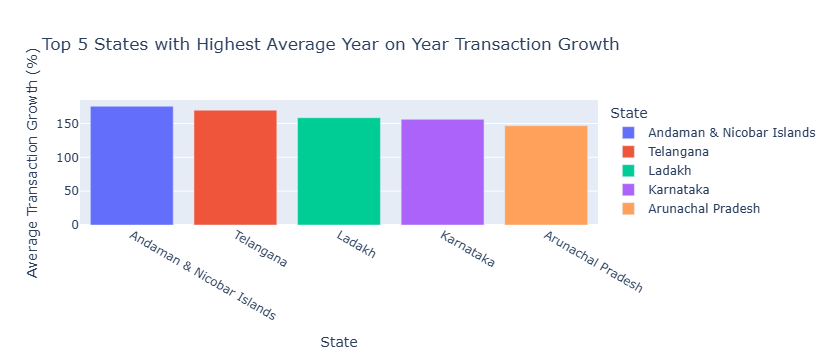

In [173]:
fig2 = px.bar(df_state_yoy_growth, x = "State", y = "Average Transaction Growth Percent",
              color = "State",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"Average Transaction Growth Percent": "Average Transaction Growth (%)",
                         "State":"State"}, title = "Top 5 States with Highest Average Year on Year Transaction Growth")
fig2.update_layout(height = 500)
fig2.show()

**Observations**

- Amongst all the states and union territories in India, Andaman & Nicobar Islands, Telangana, Ladakh, Karnataka and Arunachal Pradesh showed the highest average growth in the number of transactions between 2020 and 2024.
- Within these, Andaman & Nicobar Islands was the one with the highest year on year average growth with 175.42% increase in number of transactions.
- Although Andaman & Nicobar Islands showed the highest, there isn't a huge difference between them and Telangana which showed a growth of 169.62%, a difference of about 6%.

**Analysis**

- Market Penetration - Regions such as Andaman & Nicobar Islands, Telangana, Ladakh would have started off with relatively lower transaction volumes in 2020 compared to larger, more mature markets like Maharashtra or Delhi. As a result, even moderate absolute increases translate to high percentage growth for these states. It demonstrates PhonePe's efforts to expanding digital payments into emerging markets thereby showing this pronounced growth.
- Government and Policy Initiatives - Many of these states have benefitted from government pushes towards digitalization, financial inclusion and digital payments adoption since 2020. For example, initiatives to promote cashless transactions in remote or rural areas, improved internet connectivity (like broadband or 4G expansion) and local fintech support could have also supported adoption.
- Smaller regions like Andaman & Nicobar or Ladakh start with a very low base transaction count, so percentage growth appears much larger even if absolute transaction numbers are smaller.
- States like Karnataka are known for their digital infrastructure ecosystem, startup hubs (especially Bengaluru). They have robust merchant networks and tech-savvy populations that sustained high growth. 

#### c. Top 5 States showing the most decline in Transaction Growth from 2021-2024

In [68]:
query3 = text("""WITH state_year_summary AS (
                 SELECT State, Year, SUM(Transaction_count) AS TotalTransactions
                 FROM agg_trans WHERE Year BETWEEN 2020 AND 2024 
                 GROUP BY State, Year),
                 growth AS (
                 SELECT s.State, s.Year, s.TotalTransactions, 
                 LAG(s.TotalTransactions) OVER (PARTITION BY s.State ORDER BY s.Year) AS PreviousYearTransactions
                 FROM state_year_summary s),
                 declining_states AS (
                 SELECT State, ROUND((TotalTransactions - PreviousYearTransactions) * 100.0 / PreviousYearTransactions, 2)
                 AS YoY_Transaction_Growth_Percent
                 FROM growth
                 WHERE PreviousYearTransactions IS NOT NULL
                 AND Year = 2024
                 ORDER BY YoY_Transaction_Growth_Percent ASC
                 LIMIT 5)
                 SELECT g.State, g.Year, ROUND((g.TotalTransactions - g.PreviousYearTransactions) * 100.0 / g.PreviousYearTransactions,2)
                 AS "YoY Transaction Growth (%)"
                 FROM growth g
                 JOIN declining_states d ON g.State = d.State
                 WHERE g.PreviousYearTransactions IS NOT NULL
                 ORDER BY g.State, g.Year;""")

with engine.connect() as conn:
    df_trans_growth_decline = pd.read_sql(query3, conn)

display(df_trans_growth_decline)

,State,Year,YoY Transaction Growth (%)
0,Chandigarh,2021,158.83
1,Chandigarh,2022,121.29
2,Chandigarh,2023,-6.02
3,Chandigarh,2024,36.96
4,Goa,2021,203.94
5,Goa,2022,105.85
6,Goa,2023,95.71
7,Goa,2024,39.32
8,Kerala,2021,169.17
9,Kerala,2022,93.71


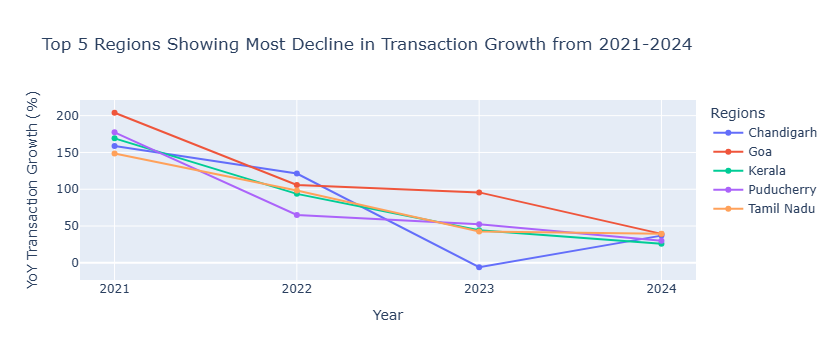

In [175]:
# Creating a line plot
fig3 = px.line(df_trans_growth_decline, x = "Year", y = "YoY Transaction Growth (%)", color = "State",
               markers = True,
               color_discrete_sequence = px.colors.qualitative.Plotly, # discrete sequence of colors
               labels = {"State":"Regions","YoY Transaction Growth (%)":"YoY Transaction Growth (%)"},
               title = "Top 5 Regions Showing Most Decline in Transaction Growth from 2021-2024")
fig3.update_xaxes(tickmode = "array", tickvals = [2019, 2020, 2021, 2022, 2023, 2024], # x-axis labels 
                  ticktext = ["2019","2020","2021","2022","2023","2024"])
fig3.update_traces(mode = "lines + markers", marker = dict(size = 6))
fig3.show()

**Observations**

- From the line plot above, we can observe that from the year 2021-2024, there are 5 regions that have shown the most decline in their year on year growth in the number of transactions. These include: Chandigarh, Goa, Kerala, Tamil Nadu and union territories like Puducherry
- Goa had the highest growth in 2021 with 203.94% but then it declined to 39.32% which is a difference of about 164.62%.
- Similarly for other regions, there has been a significant decline in transaction growth each year.
- However, one concerning observation here is that Chandigarh saw a growth of 158.83% of transactions in 2021 but in 2023, the numbers fell so drastically, it was actually 6.02% lower than in 2022 indicating a contraction in transaction volume. This negative growth suggests a loss of active users or reduced transaction frequency among existing users during that period, reflecting a temporary decline in user engagement and adoption within the city. Nonetheless, it still managed to improve its numbers and show growth of 36.96% in 2024.

**Analysis**

- Market Maturity - These regions may have reached a saturation point where most users who are comfortable with digital payments have already adopted PhonePe leading to slower or declining growth as the user base stabilizes.
- Regulatory and Technical Challenges - Technical outages, regulatory interventions or policy shifts could impact transaction volume temporarily. For example, intermittent NPCI or UPI technical issues reported widely in 2023 affected transaction success rates.
- Economic Factors - Economic slowdown, changes in user spending patterns or shifts back to cash transactions in some areas may have reduced digital transactions.

#### d. Quarters with Highest Transaction Spikes in each Year

In [70]:
query4 = text("""WITH quarterly AS (
              SELECT Year, Quarter, SUM(Transaction_count) AS TotalTransactions
              FROM agg_trans
              WHERE Year BETWEEN 2018 AND 2024
              GROUP BY Year, Quarter),
              with_prev AS (
              SELECT Year, Quarter, TotalTransactions, LAG(TotalTransactions) OVER (ORDER BY Year, Quarter) AS PrevTotalTransactions,
              CASE
               WHEN LAG(TotalTransactions) OVER (ORDER BY Year, Quarter) IS NULL THEN NULL
               WHEN LAG(TotalTransactions) OVER (ORDER BY Year, Quarter) = 0 THEN NULL
               ELSE (TotalTransactions - LAG(TotalTransactions) OVER (ORDER BY Year, Quarter)) * 100.0 / LAG(TotalTransactions) OVER (ORDER BY Year, Quarter)
              END AS TransactionSpikePct
              FROM quarterly)
              SELECT Year, Quarter AS 'Quarter With Max Pct Spike', TotalTransactions as 'Total Transactions', 
              PrevTotalTransactions as 'Prev Total Transactions', ROUND(TransactionSpikePct,2) AS 'Spike Pct'
              FROM (SELECT *,
              ROW_NUMBER() OVER (PARTITION BY Year ORDER BY CASE WHEN TransactionSpikePct IS NULL THEN 1 ELSE 0 END, TransactionSpikePct DESC) 
              AS rn
              FROM with_prev) t
              WHERE rn = 1
              ORDER BY Year;""")

with engine.connect() as conn:
    df_quarter_spike = pd.read_sql(query4, conn)

display(df_quarter_spike)

,Year,Quarter With Max Pct Spike,Total Transactions,Prev Total Transactions,Spike Pct
0,2018,3,3.412998e+08,1.873654e+08,82.16
1,2019,1,7.089930e+08,4.171116e+08,69.98
2,2020,4,2.869277e+09,2.033051e+09,41.13
3,2021,3,5.263737e+09,3.941370e+09,33.55
4,2022,2,9.131576e+09,7.593180e+09,20.26
5,2023,2,1.510956e+10,1.309052e+10,15.42
6,2024,2,2.402611e+10,2.123705e+10,13.13


In [71]:
df_quarter_spike["Quarter With Max Pct Spike"] = df_quarter_spike["Quarter With Max Pct Spike"].astype(str)
fig4 = px.bar(df_quarter_spike, x = "Year", y = "Spike Pct", color = "Quarter With Max Pct Spike",
              labels = {"Year":"Year","Spike Pct":"Transaction Spike (%)","Quarter With Max Pct Spike":"Quarter"},
              color_discrete_sequence = px.colors.qualitative.Plotly,
              title = "Quarters with Highest Transaction Spike in Each Year")
fig4.show()

**What Is A Transaction Spike?**

- A transaction spike refers to a sharp, noticeable increase in transaction volume that occurs within a specific quarter, compared to previous quarters or the same quarter in previous years.

**Observations**

- This bar plot shows the quarters in each year that displayed the highest spike in number of transactions from 2018-2024.
- We can see that quarter 3 showed the highest spike in 2018 and 2021 (82.16% and 33.55% respectively) while quarter 1 in 2019 (69.98%), quarter 4 in 2020 (41.13%) and for three years consecutively between 2022-2024, quarter 2 showed the highest spike in number of transactions (20.26%, 15.42%, 13.13%) although the spikes did decrease over the years.

**Analysis**

- 2018 and 2021 spikes - The spikes in transaction during Quarter 3 aligns with the major festivities in India such as Ganesh Chaturthi and Janmashtami. However, the unprecedented spike observed can be traced to PhonePe's aggressive expansion and merchant onboarding during these years, particularly in the Tier 2/3 cities.
- In 2018, PhonePe was penetrating deep into new markets, creating a surge in merchant payments but in 2021, spike reflects pandemic-driven digital adoption combined with government relief disbursements and festive spending concentrated in that period.
- in 2020, the spike in Quarter 4 could be explained by a sudden shift in digital payments due to COVID-19 restrictions and lockdowns forcing contactless payments during this period, at the end of the year. The spike reflects pent up customer demand after initial lockdowns.
- The spikes from 2022-2024, especially in Quarter 2, correspond with financial year end transactions like tax payments, school fee collections and financial product renewals. The decreasing magnitude reflects market maturation where the extraordinary pandemic-triggered surge in digital payments is normalizing.

#### e. Percentage Share of All Transactions By Each Payment Type

In [72]:
query5 = text("""WITH yearly_totals AS (
                 SELECT Year, SUM(Transaction_amount) AS TotalTransactionAmount
                 FROM agg_trans
                 GROUP BY Year),
                 type_share AS (
                 SELECT a.Year, a.Transaction_type AS TransactionType, SUM(a.Transaction_amount) AS TransactionAmount,
                 SUM(a.Transaction_amount) * 100.0 / y.TotalTransactionAmount AS SharePct
                 FROM agg_trans a
                 JOIN yearly_totals y ON a.Year = y.Year
                 GROUP BY a.Year, a.Transaction_type, y.TotalTransactionAmount)
                 SELECT TransactionType AS "Transaction Type", ROUND(AVG(SharePct), 2) AS "Average Share Pct"
                 FROM type_share
                 GROUP BY TransactionType;""")

with engine.connect() as conn:
    df_trans_type_high_share = pd.read_sql(query5, conn)

display(df_trans_type_high_share)

,Transaction Type,Average Share Pct
0,Recharge & Bill Payments,4.63
1,Peer To Peer Payments,81.43
2,Merchant Payments,13.60
3,Financial Services,0.07
4,Others,0.27


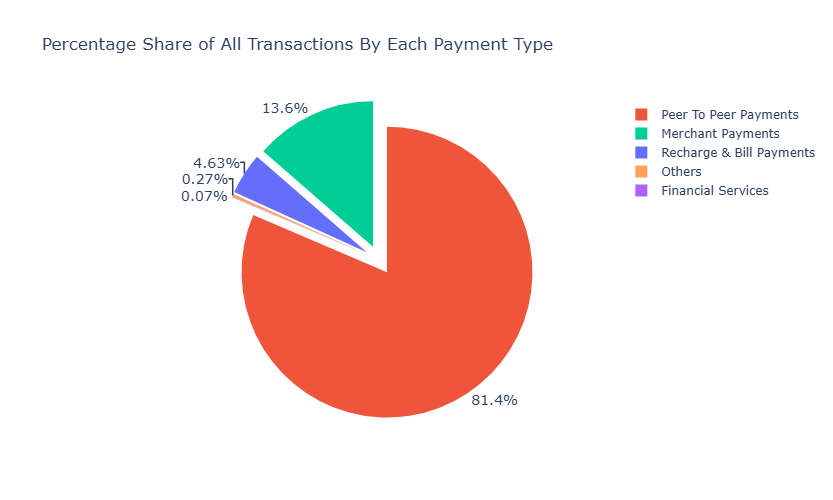

In [168]:
# Creating a pie plot
fig5 = px.pie(df_trans_type_high_share, names = "Transaction Type", values = "Average Share Pct", 
              color = "Transaction Type",
              color_discrete_sequence = px.colors.qualitative.Plotly, # discrete sequence of colors
              title = "Percentage Share of All Transactions By Each Payment Type")

fig5.update_traces(textposition = "outside", pull = 0.1) # ensuring that the pie slices are viewed outside the pie chart 
fig5.update_layout(width = 600, height = 500, uniformtext_minsize = 14, uniformtext_mode = "show")
fig5.show()

**What do each payment type mean?**

1. Peer To Peer Payments - Direct money transfer between two individuals using PhonePe wallet. For eg: sending money to family, paying rent to a landlord.
2. Merchant Payments - Payments made to merchants for goods or services. For eg: paying a shopkeeper via QR Code at a grocery store, buying products from e-commerce platforms using PhonePe.
3. Recharge & Bill Payments - Paying utility bills and recharging prepaid services. For eg: Mobile/Data Card charges, electricity/gas bill payments
4. Financial Services - Transactions and purchases related to investment and insurance products or credit. For eg: buying or renewing insurance, mutual funds or SIPs.

**Observations**

- We can see that out of all the transactions made across all regions and all years, 81.4% of them are Peer To Peer Transactions, 13.6% are Merchant Payments but only 0.07% are for Financial Services.

**Analysis**

- The dominance of P2P transactions can be explained by the fact that PhonePe's core is built on UPI infrastructure, which was designed for instant bank-to-to bank transfers. Most users initially adopted digital payments to send money to friends, relatives, family hence P2P remains dominant.
- In rural or semi-urban areas, merchant acceptance is limited while P2P is accessible and solves everyday needs like bill splits, salary payments for domestic help.
- Financial Services share a very low percentage of total transactions made probably because of lack of awareness amongst users for insurance or investment payments. Most users engage with the app for instant transfers and simple payments, not for investing or buying insurance, which are less frequent. The nature of thes transactions are such that they are infrequent compared to P2P or other transactions, often high value resulting in negligible volume of overall transactions.

### 2. Device Dominance and User Engagement Analysis

- PhonePe aims to enhance user engagement and improve app performance by understanding user preferences across different device brands. 
- The data reveals the number of registered users and app opens, segmented by device brands, regions, and time periods. 
- However, trends in device usage vary significantly across regions, and some devices are disproportionately underutilized despite high registration numbers.

#### a. Device Brands with the Highest and Lowest Number of PhonePe App Users

In [74]:
query6 = text("""WITH brand_users AS (
                 SELECT Brand_name AS Brandname, SUM(User_count) AS Totalusers 
                 FROM agg_user
                 GROUP BY Brand_name),
                 ranked AS (
                 SELECT Brandname, Totalusers,
                 RANK() OVER (ORDER BY Totalusers DESC) AS rank_highest,
                 RANK() OVER (ORDER BY Totalusers ASC) AS rank_lowest
                 FROM brand_users)
                 SELECT Brandname, Totalusers 
                 FROM ranked 
                 WHERE rank_highest <= 3 OR rank_lowest <= 3
                 ORDER BY Totalusers DESC;""")

with engine.connect() as conn:
    df_device_brand_users = pd.read_sql(query6, conn)

display(df_device_brand_users)

,Brandname,Totalusers
0,Xiaomi,869562617.0
1,Samsung,671603711.0
2,Vivo,625415019.0
3,HMD Global,336632.0
4,Lyf,1271.0
5,COOLPAD,10.0


In [75]:
df_device_brand_users = df_device_brand_users.rename(columns = {"Brandname":"Brand Name", 
                                                                "Totalusers":"Total Users"})
display(df_device_brand_users)

,Brand Name,Total Users
0,Xiaomi,869562617.0
1,Samsung,671603711.0
2,Vivo,625415019.0
3,HMD Global,336632.0
4,Lyf,1271.0
5,COOLPAD,10.0


In [76]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top3_df = df_device_brand_users.iloc[0:3] # first 3 rows = top 3 brands 
bottom3_df = df_device_brand_users.iloc[3:] # last 3 rows = bottom 3 brands

palette = px.colors.qualitative.Plotly # plotly color palette 

# assigning distinct color to each bar in the top and bottom charts
top3_colors = [palette[i % len(palette)] for i in range(len(top3_df))] 
bottom3_colors = [palette[i % len(palette)] for i in range(len(bottom3_df))]

# creating a figure with 2 sub plots side by side for top and bottom brands
fig6 = make_subplots(rows = 1, cols = 2, subplot_titles = ("Top 3 Mobile Brands",
                                                           "Bottom 3 Mobile Brands"))

# adding bar chart for the top 3 brands 
fig6.add_trace(go.Bar(x = top3_df["Brand Name"], y = top3_df["Total Users"],
                      marker_color = top3_colors), row = 1, col = 1)

# adding bar chart for the bottom 3 brands
fig6.add_trace(go.Bar(x = bottom3_df["Brand Name"], y = bottom3_df["Total Users"],
                     marker_color = bottom3_colors), row = 1, col = 2)

# setting the overall title and adding a legend to the plots
fig6.update_layout(title_text = "Total Number of PhonePe Users For Each Device Brand", showlegend = False)
fig6.show()

**Observations**

- From this bar plot, we can see that Xiaomi, Samsung, Vivo have the highest number of total PhonePe App users while brands like HMD Global, Lyf and COOLPAD have the lowest.
- Amongst the top 3 mobile brands, Xiaomi has the highest number of users, 86.9 Cr users which is approximately 29% higher than Samsung.

**Analysis**

- Market Penetration - Amongst the top mobile brands, Xiaomi ranks the highest because it has consistently held the position for India's top smartphone vendor, dominating the budget and mid-range device categories. With a large install base in rural and semi-urban regions, Xiaomi phones bring PhonePe to a wider, often first time digital payments user group.
- Pre-Installed Apps And Early UPI Integration - Xiaomi closely integrates payment apps like PhonePe, enables easy installation and optimal functioning of these apps which plays a critical role in driving PhonePe registration and usage rates.
- Brands like HMD Global, Lyf, COOLPAD have lower number of PhonePe users because of the fact that they have a much smaller market presence compared to giants like Xiaomi, Samsung and Vivo which naturally translates to lower PhonePe app emissions across India.

#### b. Top 3 and Bottom 3 States with the Highest and Lowest App Engagement Rates

In [77]:
query7 = text("""WITH app_engagement AS (
                SELECT State AS "State", ROUND(AVG(Registered_users), 2) AS AvgRegUsers, ROUND(AVG(Number_of_app_opens), 2) AS AvgAppOpens
                FROM map_user
                GROUP BY State),
                engagement_rate AS (
                SELECT State, ROUND(AvgAppOpens / AvgRegUsers, 2) AS EngagementRate 
                FROM app_engagement)
                (SELECT * FROM engagement_rate
                ORDER BY EngagementRate DESC
                LIMIT 3)
                UNION ALL
                (SELECT * FROM engagement_rate ORDER BY EngagementRate ASC LIMIT 3)
                ORDER BY EngagementRate DESC;""")

with engine.connect() as conn:
    df_state_user_eng_rate = pd.read_sql(query7, conn)

display(df_state_user_eng_rate)

,State,EngagementRate
0,Meghalaya,174.36
1,Arunachal Pradesh,138.85
2,Mizoram,136.57
3,Puducherry,17.10
4,Delhi,14.93
5,Chandigarh,13.40


In [78]:
df_state_user_eng_rate = df_state_user_eng_rate.rename(columns = {"EngagementRate":"Engagement Rate"})
display(df_state_user_eng_rate)

,State,Engagement Rate
0,Meghalaya,174.36
1,Arunachal Pradesh,138.85
2,Mizoram,136.57
3,Puducherry,17.10
4,Delhi,14.93
5,Chandigarh,13.40


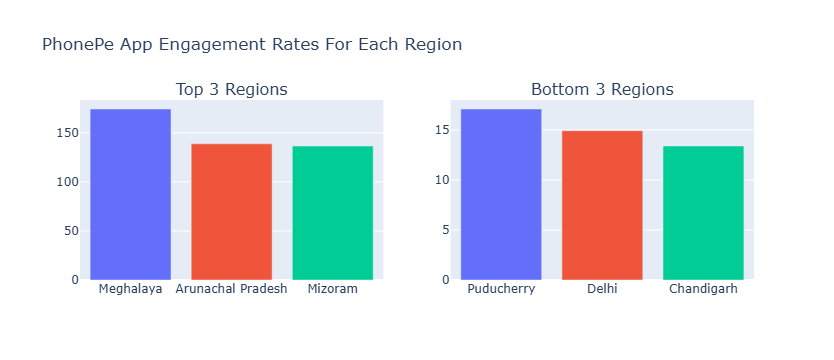

In [305]:
top3_eng = df_state_user_eng_rate.iloc[0:3]
bottom3_eng = df_state_user_eng_rate.iloc[3:]

palette = px.colors.qualitative.Plotly

top3_colors = [palette[i % len(palette)] for i in range(len(top3_eng))] # first 3 rows = top 3 regions
bottom3_colors = [palette[i % len(palette)] for i in range(len(bottom3_eng))] # last 3 rows = bottom 3 regions

# Making 2 different sub plots for top 3 and bottom 3 regions
fig7 = make_subplots(rows = 1, cols = 2, subplot_titles = ("Top 3 Regions",
                                                           "Bottom 3 Regions"))

# creating bar plot for top 3 regions 
fig7.add_trace(go.Bar(x = top3_eng["State"], y = top3_eng["Engagement Rate"],
                      marker_color = top3_colors), row = 1, col = 1)
# creating bar plot for bottom 3 regions 
fig7.add_trace(go.Bar(x = bottom3_eng["State"], y = bottom3_eng["Engagement Rate"],
                     marker_color = bottom3_colors), row = 1, col = 2)

# setting the title of the whole plot and showing the legends
fig7.update_layout(title_text = "PhonePe App Engagement Rates For Each Region", showlegend = False)
fig7.show()

**What does App Engagement Rate mean?**

- It refers to the number of registered users who actually open and use the app over a specific period of time.
- The rate is calculated by: Average times of App Opens/Registered Users.

**Observations**

- The top 3 regions with the highest app engagement rate are Meghalaya, Arunachal Pradesh and Mizoram while the bottom 3 regions are Puducherry, Delhi, Chandigarh
- Amongst the top 3 regions, Meghalaya has the highest app engagement rate of 174.36 app opens/registered user which is 35.51 higher than Arunachal Pradesh

**Analysis**

- States like Mizoram, Arunachal Pradesh and Mizoram have seen rapid adoption of smartphones and digital payments in recent years, often leapfrogging traditional banking infrastructure. The high engagement rates observed may reflect the populations' reliance on mobile apps like PhonePe for daily financial transactions.
- In the North East, smaller population hubs tend to rely on mobile apps for varied services - and repeat usage for payments, bill payments and bank transfers may be higher because of fewer alternative options and reliance on digital financial services.
- In contrast, regions like Puducherry, Delhi and Chandigarh have more mature digital ecosystems with multiple competing payment apps possibly leading to lower relative usage per registered user on PhonePe.

#### c. Best Quarter Each with Highest User Engagement

In [80]:
query8 = text("""WITH quarterly_engagement AS (
                 SELECT Year, Quarter, ROUND(SUM(Number_of_app_opens)/SUM(Registered_users), 4) AS EngagementRate
                 FROM map_user
                 GROUP BY Year, Quarter),
                 ranked AS (
                 SELECT Year, Quarter, EngagementRate,
                 RANK() OVER (PARTITION BY Year ORDER BY EngagementRate DESC) AS rank_highest,
                 RANK() OVER (PARTITION BY Year ORDER BY EngagementRate ASC) AS rank_lowest
                 FROM quarterly_engagement)
                 SELECT Year, Quarter, EngagementRate as 'Engagement Rate' FROM ranked
                 WHERE rank_highest = 1 OR rank_lowest = 1
                 ORDER BY Year, Quarter, EngagementRate ASC;""")

with engine.connect() as conn:
    df_quarter_user_eng_rate = pd.read_sql(query8, conn)

display(df_quarter_user_eng_rate)

,Year,Quarter,Engagement Rate
0,2018,1,0.0000
1,2018,2,0.0000
2,2018,3,0.0000
3,2018,4,0.0000
4,2019,1,0.0000
5,2019,4,24.1255
6,2020,2,19.8982
7,2020,4,28.2347
8,2021,1,30.3015
9,2021,4,43.2066


In [81]:
# removing data from 2018 as the engagement rate analysis starts from 2019
df_quarter_user_eng_rate = df_quarter_user_eng_rate[df_quarter_user_eng_rate["Year"]!=2018]

# converting quarters into strings so that Plotly treats it as a category instead of an integer
df_quarter_user_eng_rate["Quarter"] = df_quarter_user_eng_rate["Quarter"].astype(str)

# sorting the values in ascending order 
df_quarter_user_eng_rate = df_quarter_user_eng_rate.sort_values(["Year","Engagement Rate"], ascending = [True, True])

# building grouped bar chart, colored by quarter  
fig8 = px.bar(df_quarter_user_eng_rate, x = "Year", y = "Engagement Rate",
             barmode = "group", labels = {"Year":"Year", "Quarter":"Quarter", "Engagement Rate":"Engagement Rate"}, 
             color = "Quarter",
             color_discrete_sequence = px.colors.qualitative.Plotly,
             title = "Highest and Lowest PhonePe App User Engagement Rate Per Year")

fig8.show()

**Observations**

- The observations indicate a consistent trend: PhonePe’s app engagement rate peaks during the fourth quarter every year, with a steady increase from 24.12 to 68.88 between 2019 and 2024. Conversely, the first quarter generally shows the lowest engagement rate, with only a single exception in 2020 when the second quarter reflected the lowest engagement.

**Analysis**

- PhonePe’s app engagement rate consistently peaks during the fourth quarter each year, driven by high user activity during major festivals (such as Diwali, Christmas), year-end shopping and promotional events. This period prompts users to make payments for travel, gifts and other expenses.
- Lower engagement in the first quarter is typical as user spending slows down after the holiday season, with fewer incentives and reduced discretionary spending in this period.
- The distinct dip in 2020 during the second quarter, coincides with the early COVID-19 lockdown in India, which disrupted normal payment behavior and economic activity, leading to unusually low app usage.

### 3. Insurance Penetration and Growth Potential Analysis

- PhonePe has ventured into the insurance domain, providing users with options to secure various policies. 
- With increasing transactions in this segment, the company seeks to analyze its growth trajectory and identify untapped opportunities for insurance adoption at the state level. 
- This data will help prioritize regions for marketing efforts and partnerships with insurers.

#### a. Growth in Insurance Transactions and Value each over the years across all states

In [82]:
query9 = text("""WITH yearly_insurance AS (
                 SELECT Year, SUM(Insurance_count) AS TotalInsurance, SUM(Insurance_amount) AS TotalValue
                 FROM agg_ins
                 WHERE Year BETWEEN 2020 AND 2024
                 GROUP BY Year),
                 growth AS (
                 SELECT Year, TotalInsurance, TotalValue, LAG(TotalInsurance) OVER (ORDER BY Year) AS PrevTransactions,
                 LAG(TotalValue) OVER (ORDER BY Year) AS PrevValue
                 FROM yearly_insurance)
                 SELECT Year, TotalInsurance as "No of Insurance Transactions", TotalValue "Total Insurance Amount",
                 ROUND((TotalInsurance - PrevTransactions) * 100.0 / PrevTransactions, 2) AS "Insurance Transaction Growth (%)",
                 ROUND((TotalValue - PrevValue) * 100.0 / PrevValue, 2) AS "Insurance Amount Growth (%)"
                 FROM growth
                 WHERE PrevTransactions IS NOT NULL AND PrevValue IS NOT NULL
                 ORDER BY Year;""")

with engine.connect() as conn:
    df_ins_growth_each_year = pd.read_sql(query9, conn)

display(df_ins_growth_each_year)

,Year,No of Insurance Transactions,Total Insurance Amount,Insurance Transaction Growth (%),Insurance Amount Growth (%)
0,2021,1583282.0,1.499170e+09,100.86,409.56
1,2022,3090116.0,4.238843e+09,95.17,182.75
2,2023,3986187.0,6.056606e+09,29.00,42.88
3,2024,5067844.0,7.926752e+09,27.14,30.88


In [83]:
fig9 = px.bar(df_ins_growth_each_year, x = "Year", y = ["Insurance Transaction Growth (%)", "Insurance Amount Growth (%)"],
              barmode = "group",
              color_discrete_sequence = px.colors.qualitative.Plotly,
              labels = {"Year":"Year","Insurance Transaction Growth (%)":"Insurance Transaction Growth (%)",
                        "Insurance Amount Growth (%)":"Insurance Amount Growth (%)","variable":"Metric", 
                        "value":"Growth (%)"},
             title = "Growth in Number Of Transactions and Total Insurance Transactions Over The Years")
              
fig9.show()

**Observations**

- We can see that overall the number of insurance transactions made and the total amount peaked in 2021 and since then has been decreasing constantly until 2024.
- At its peak, PhonePe saw a 100.86% increase in insurance transactions and a 409.56% increase in the total amount of transactions made.
- After which, it decreased to 27.14% and 30.88% in 2024, which is a decrease of about 63% and 369% respectively.

**Analysis**

- The sharp spike in PhonePe's insurance transactions and value in 2021 can be attributed to company's launch and aggressive expansion into the digital insurance market, including innovative offerings like monthly premium plans that made insurance more affordable and accessible to a broad base of users. This along with targeted marketing and availability of multiple insurance products, created significant early momentum and consumer trust, triggering unprecedented growth.

- However, after 2021, as the market matured and the initial surge in adoption plateaued, the rate of growth decreased sharply from 2022 to 2024. Moreover, competition in the digital insurance space may have slowed subsequent growth, as the remaining population includes users that are harder to convert due to low insurance literacy or limited purchasing power.

#### b. Top 5 States with Highest Insurance Transaction Value over the past years

In [161]:
query10 = text("""WITH yearly_totals AS (
                  SELECT State, Year, SUM(Insurance_amount) AS total_value FROM agg_ins
                  GROUP BY state, year)
                  SELECT State, (MAX(total_value) - MIN(total_value)) AS InsuranceTransactionValue
                  FROM yearly_totals
                  GROUP BY state
                  ORDER BY InsuranceTransactionValue DESC
                  LIMIT 5;""")

with engine.connect() as conn:
    df_high_insurance_trans = pd.read_sql(query10, conn)

display(df_high_insurance_trans)

,State,InsuranceTransactionValue
0,Karnataka,1.053252e+09
1,Maharashtra,8.387094e+08
2,Uttar Pradesh,6.722907e+08
3,Tamil Nadu,6.085346e+08
4,Kerala,4.914129e+08


In [162]:
df_high_insurance_trans["InsuranceTransactionValue"] = df_high_insurance_trans["InsuranceTransactionValue"]/1e7
display(df_high_insurance_trans)

,State,InsuranceTransactionValue
0,Karnataka,105.325227
1,Maharashtra,83.870941
2,Uttar Pradesh,67.229073
3,Tamil Nadu,60.853457
4,Kerala,49.141287


In [164]:
# renaming the columns 

df_high_insurance_trans = df_high_insurance_trans.rename(columns = 
                                                         {"InsuranceTransactionValue":"Insurance Transaction Value (in Cr)"})
display(df_high_insurance_trans)

,State,Insurance Transaction Value (in Cr)
0,Karnataka,105.325227
1,Maharashtra,83.870941
2,Uttar Pradesh,67.229073
3,Tamil Nadu,60.853457
4,Kerala,49.141287


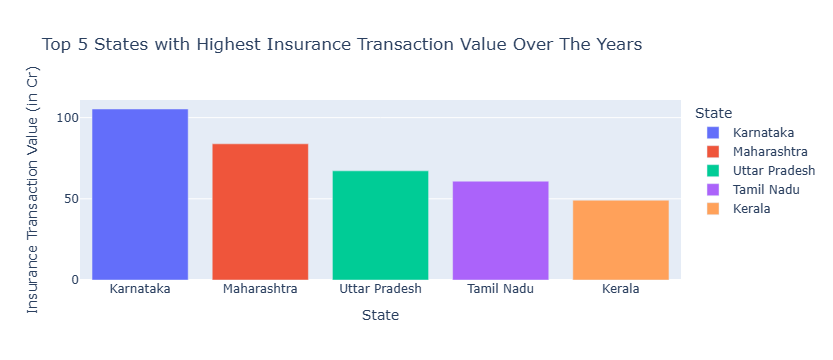

In [167]:
fig10 = px.bar(df_high_insurance_trans, x = "State", y = "Insurance Transaction Value (in Cr)",
               color = "State",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"State":"State","Insurance Transaction Value (in Cr)":"Insurance Transaction Value (in Cr)"},
               title = "Top 5 States with Highest Insurance Transaction Value Over The Years")
              
fig10.show()

**Percentage difference between the state at 1st and state at 5th**

In [ ]:
# finding the percentage difference between the values so that they can be used while analyzing the results

karnataka_val = df_high_insurance_trans.loc[df_high_insurance_trans["State"] == "Karnataka", "Insurance Transaction Value (in Cr)"].sum()
kerala_val = df_high_insurance_trans.loc[df_high_insurance_trans["State"] == "Kerala", "Insurance Transaction Value (in Cr)"].sum()

pct_diff = ((karnataka_val - kerala_val) / kerala_val) * 100
print(pct_diff)

**Observations**

- The Top 5 States with the highest insurance transaction value are Karnataka (105.32 Cr), Maharashtra (83.87 Cr), Uttar Pradesh (67.3 Cr), Tamil Nadu (60.8 Cr), Kerala (49.1 Cr).
- Karnataka has the highest insurance transaction value over the years

**Analysis**

- This is understandable as Karnataka is a state with high financial awareness and literacy, particularly Bengaluru which has a large population of educated and tech-savvy consumers who are more likely to purchase insurance products.
- Bengaluru known as the tech and startup hub, hosts a significant number of high-net-worth individuals (HNI) and salaried professionals who have the financial capability and motivation to invest in insurance, driving up the transaction value.

#### c. Identify Untapped States (High Total Transaction Values but Relatively Low Insurance Penetration)

In [184]:
query11 = text("""WITH total_activity AS (
                  SELECT state, SUM(Transaction_count) AS total_txn_count, SUM(Transaction_amount) AS total_txn_value
                  FROM agg_trans
                  GROUP BY state),
                  insurance_activity AS (
                  SELECT State, SUM(Insurance_count) AS total_insurance_count, SUM(Insurance_amount) AS total_insurance_value
                  FROM agg_ins
                  GROUP BY State),
                  combined AS (
                  SELECT t.State, t.total_txn_count, t.total_txn_value, i.total_insurance_count, i.total_insurance_value,
                  ROUND((i.total_insurance_count * 100.0 / NULLIF(t.total_txn_count, 0)), 5) AS insurance_penetration_rate,
                  ROUND((i.total_insurance_value * 100.0 / NULLIF(t.total_txn_value, 0)), 5) AS insurance_value_share
                  FROM total_activity t
                  LEFT JOIN insurance_activity i ON t.state = i.state)
                  SELECT State, total_txn_count as 'Total Transactions', total_txn_value as 'Total Transaction Amount', 
                  total_insurance_count as 'Total Insurances', total_insurance_value as 'Total Insurance Amount', 
                  insurance_penetration_rate as "Insurance Penetration Rate", 
                  insurance_value_share as "Insurance Value Share"
                  FROM combined
                  WHERE insurance_penetration_rate IS NOT NULL
                  ORDER BY insurance_penetration_rate ASC
                  limit 5;""")

with engine.connect() as conn:
    df_untapped_region = pd.read_sql(query11, conn)

display(df_untapped_region)

,State,Total Transactions,Total Transaction Amount,Total Insurances,Total Insurance Amount,Insurance Penetration Rate,Insurance Value Share
0,Telangana,2.617468e+10,4.165596e+13,894342.0,1.171060e+09,0.00342,0.00281
1,Madhya Pradesh,1.407218e+10,1.912528e+13,487180.0,7.111535e+08,0.00346,0.00372
2,Odisha,8.918527e+09,1.226398e+13,318769.0,4.165592e+08,0.00357,0.00340
3,Andhra Pradesh,1.891870e+10,3.466908e+13,697769.0,8.122230e+08,0.00369,0.00234
4,Rajasthan,1.710854e+10,2.634324e+13,639684.0,9.596539e+08,0.00374,0.00364


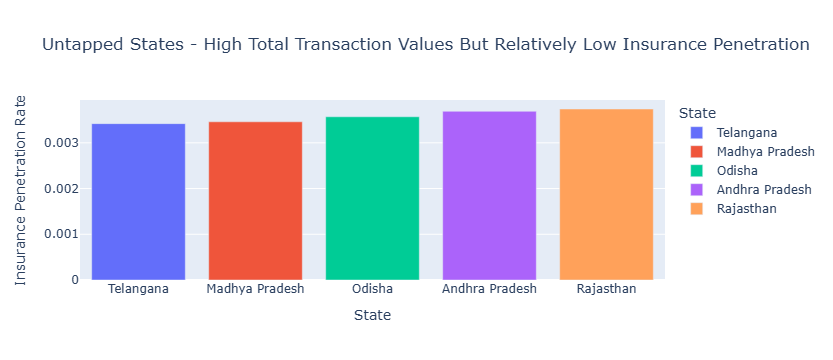

In [182]:
fig11 = px.bar(df_untapped_region, x = "State", y = ["Insurance Penetration Rate"], 
               color = 'State',
               color_discrete_sequence = px.colors.qualitative.Plotly, 
               labels = {"State": "State","variable": "Metric","value": "Insurance Penetration Rate"},
               title = "Untapped States - High Total Transaction Values But Relatively Low Insurance Penetration")
fig11.show()

**What is meant by Untapped States?**

- These are states where users frequently transact on PhonePe (high overall digital payment volume) but a small portion of the spending goes towards insurance purchases.
- In other words, while users in this state are digitally active and financially engaged, they are not adopting insurance products at the same rate as their overall spending or transaction activity would suggest.
- This would highlight opportunities for PhonePe to target insurance promotion efforts in these regions because digital infrastructure and user base exist but insurance sales are lagging.
- It is calculated by: Total Number of Insurance Payments/Total Number of PhonePe Transactions

**Observation**

- We can see that Telangana has the lowest insurance penetration rate of 0.00342 although the other 4 states: Madhya Pradesh, Odisha, Andhra Pradesh, Rajasthan are not much behind with (0.00346, 0.00357, 0.00369, 0.00374 respectively).

**Analysis**

- Over here, a low insurance penetration rate would mean that it has high overall digital transaction volumes but a smaller proportion of these transactions are earmarked for insurance products, indicating users may prefer other financial products or insurance transactions is relatively nascent to transaction volume.
- A state like Telangana, which has been formed relatively recently, might have a stronger focus on payments and wallet services rather than insurance and user preference may lean towards convenient transactions than investment or insurance purchases.

### 4. User Engagement and Growth Strategy

- PhonePe seeks to enhance its market position by analyzing user engagement across different states and districts.
- With a significant number of registered users and app opens, understanding user behavior can provide valuable insights for strategic decision-making and growth opportunities.

#### a. States showing consistent growth in both user registration and repeat transaction

In [187]:
query12 = text("""WITH yearly_user_growth AS (
                  SELECT state, year, SUM(Registered_users) AS yearly_registered
                  FROM map_user
                  GROUP BY state, year),
                  user_growth_rate AS (
                  SELECT state, year, yearly_registered, LAG(yearly_registered) OVER (PARTITION BY state ORDER BY year) AS prev_registered,
                  ROUND((yearly_registered - LAG(yearly_registered) OVER (PARTITION BY state ORDER BY year)) * 100.0 / LAG(yearly_registered) OVER (PARTITION BY state ORDER BY year), 2) AS reg_growth_pct
                  FROM yearly_user_growth),
                  yearly_txn_growth AS (
                  SELECT state, year, SUM(transaction_count) AS yearly_txns
                  FROM agg_trans GROUP BY state, year),
                  txn_growth_rate AS (
                  SELECT state, year, yearly_txns, LAG(yearly_txns) OVER (PARTITION BY state ORDER BY year) AS prev_txns,
                  ROUND((yearly_txns - LAG(yearly_txns) OVER (PARTITION BY state ORDER BY year)) * 100.0 / LAG(yearly_txns) OVER (PARTITION BY state ORDER BY year), 2) AS txn_growth_pct
                  FROM yearly_txn_growth),
                  combined AS (
                  SELECT u.state, u.year, u.reg_growth_pct, t.txn_growth_pct FROM user_growth_rate u
                  JOIN txn_growth_rate t 
                  ON u.state = t.state AND u.year = t.year
                  WHERE u.prev_registered IS NOT NULL AND t.prev_txns IS NOT NULL)
                  SELECT state, ROUND(AVG(reg_growth_pct), 2) AS avg_user_growth_pct, 
                  ROUND(AVG(txn_growth_pct), 2) AS avg_txn_growth_pct
                  FROM combined GROUP BY state HAVING AVG(reg_growth_pct) > 0 AND AVG(txn_growth_pct) > 0
                  ORDER BY avg_txn_growth_pct DESC LIMIT 10;""")

with engine.connect() as conn:
    df_state_consistent_growth = pd.read_sql(query12, conn)

display(df_state_consistent_growth)

,state,avg_user_growth_pct,avg_txn_growth_pct
0,Andaman & Nicobar Islands,56.38,175.42
1,Telangana,39.40,169.62
2,Ladakh,51.42,158.46
3,Karnataka,44.16,156.13
4,Arunachal Pradesh,62.16,146.58
5,Rajasthan,42.10,145.34
6,Maharashtra,42.60,137.01
7,Goa,43.87,132.68
8,Sikkim,49.04,131.05
9,Chhattisgarh,45.91,128.68


In [188]:
df_state_consistent_growth = df_state_consistent_growth.rename(columns = {"state":"State", 
                                                                          "avg_user_growth_pct":"Average User Growth (%)",
                                                                          "avg_txn_growth_pct":"Average Transaction Growth (%)"})
display(df_state_consistent_growth)

,State,Average User Growth (%),Average Transaction Growth (%)
0,Andaman & Nicobar Islands,56.38,175.42
1,Telangana,39.40,169.62
2,Ladakh,51.42,158.46
3,Karnataka,44.16,156.13
4,Arunachal Pradesh,62.16,146.58
5,Rajasthan,42.10,145.34
6,Maharashtra,42.60,137.01
7,Goa,43.87,132.68
8,Sikkim,49.04,131.05
9,Chhattisgarh,45.91,128.68


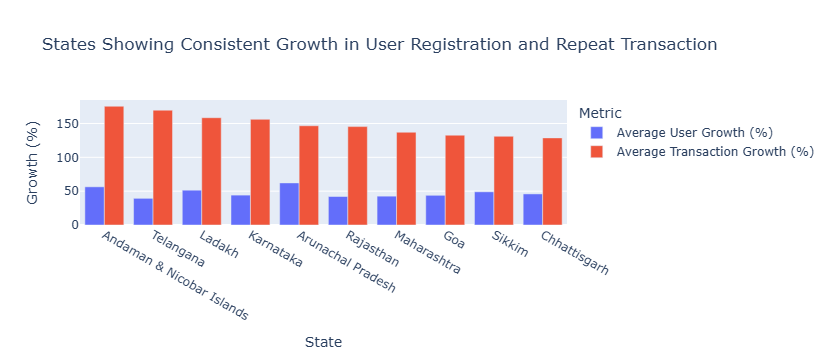

In [190]:
fig12 = px.bar(df_state_consistent_growth, x = "State", y = ["Average User Growth (%)", "Average Transaction Growth (%)"], 
               barmode = "group", color_discrete_sequence = px.colors.qualitative.Plotly, 
               labels = {"State": "State","variable": "Metric","value": "Growth (%)"},
               title = "States Showing Consistent Growth in User Registration and Repeat Transaction")
fig12.show()

**Observations**

- Across all the states and union territories in India, the average repeat transaction growth is significantly higher than the growth in the number of registered users.
- Among these regions, Andaman & Nicobar Islands, Telangana and Ladakh show significant growth in repeat transactions compared to other regions with growth of about (175.42%, 169.62%, 158.46% respectively).
- However, Arunachal Pradesh displays the highest growth in registered users compared to other regions with a growth of 62.16% although is repeat transaction growth is lower. It is nonetheless a state with a lot of potential for scalable growth because it has shown a balanced growth trajectory for both the metrics.

**Analysis**

- The fact that repeat transaction growth outpaces new user registration in the different states and union territories indicate PhonePe's success in deepening engagement amongst its existing user base.
- As states and union territories such as Andaman & Nicobar Islands, Telangana and Ladakh demonstrate excellent repeat transaction growth, it suggests that the users in these regions, once they register, they quickly become active adopters of digital payments, engaging regularly in transactions using the PhonePe app.
- Arunachal Pradesh's high repeat transaction growth rate (146.58%) and user growth rate (62.16%) marks it as a region with untapped potential for scalable growth. It is expanding to new users as well as displaying healthy levels of repeat activity, pointing to efficient outreach of digital literacy initiatives.

#### b. Percentage Distribution Of App Opens Across Districts Within Top 3 States

In [136]:
query13 = text("""WITH district_metrics AS (
                  SELECT State, District_name, SUM(Registered_users) AS total_registered_users,
                  SUM(Number_of_app_opens) AS total_app_opens
                  FROM map_user
                  GROUP BY State, District_name),
                  state_totals AS (
                  SELECT State, SUM(total_registered_users) AS state_total_registered,
                  SUM(total_app_opens) AS state_total_app_opens
                  FROM district_metrics
                  GROUP BY State),
                  joined_data AS (
                  SELECT dm.State, dm.District_name, dm.total_registered_users, dm.total_app_opens,
                  ROUND((dm.total_app_opens / st.state_total_app_opens) * 100, 2) AS app_open_share_percent
                  FROM district_metrics dm 
                  JOIN state_totals st ON dm.State = st.State),
                  state_ranking AS (
                  SELECT State, SUM(total_registered_users) AS state_registered_users
                  FROM district_metrics
                  GROUP BY State),
                  top3_states AS (
                  SELECT State FROM state_ranking ORDER BY state_registered_users DESC LIMIT 3),
                  ranked_districts AS (
                  SELECT jd.*, ROW_NUMBER() OVER (PARTITION BY State ORDER BY total_registered_users DESC) AS district_rank
                  FROM joined_data jd
                  WHERE jd.State IN (SELECT State FROM top3_states))
                  SELECT State, District_name AS 'District Name', total_app_opens AS 'Total App Opens',
                  app_open_share_percent AS 'App Open Share'
                  FROM ranked_districts
                  WHERE district_rank <= 5
                  ORDER BY State, district_rank;""")

with engine.connect() as conn:
    df_district_metrics = pd.read_sql(query13, conn)

display(df_district_metrics)

,State,District Name,Total App Opens,App Open Share
0,Karnataka,Bengaluru Urban District,8.626629e+09,22.50
1,Karnataka,Belagavi District,2.085826e+09,5.44
2,Karnataka,Mysuru District,1.445849e+09,3.77
3,Karnataka,Tumakuru District,1.747278e+09,4.56
4,Karnataka,Dakshina Kannada District,7.058308e+08,1.84
5,Maharashtra,Pune District,6.244893e+09,12.59
6,Maharashtra,Thane District,2.062242e+09,4.16
7,Maharashtra,Mumbai Suburban District,1.644028e+09,3.31
8,Maharashtra,Nashik District,3.388420e+09,6.83
9,Maharashtra,Nagpur District,1.692098e+09,3.41


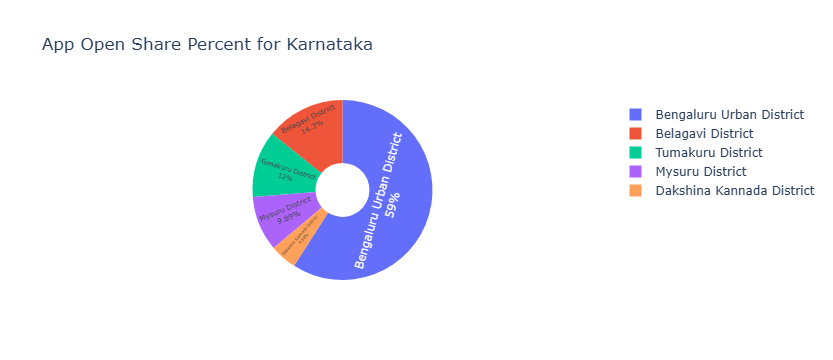

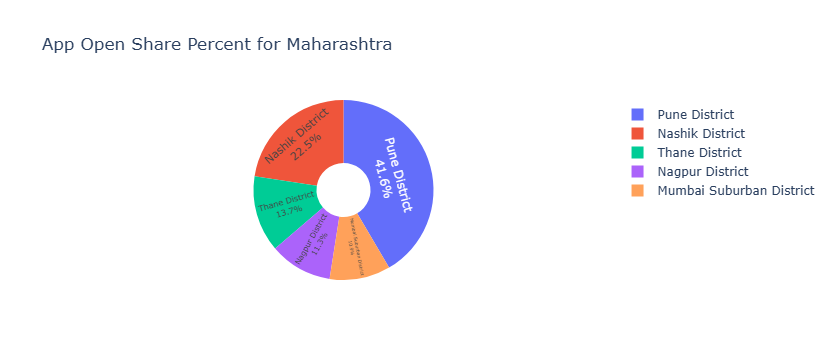

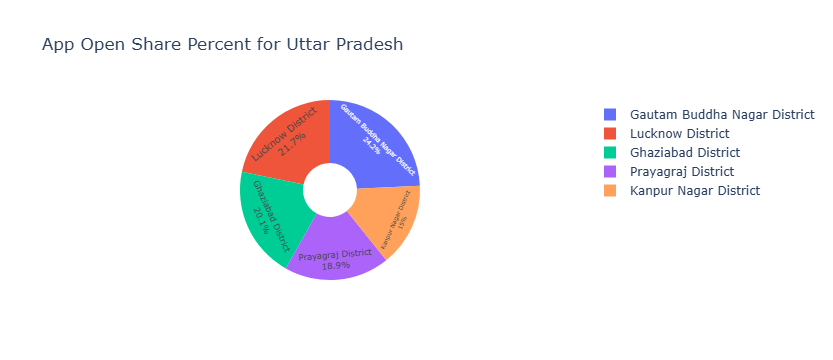

In [132]:
import plotly.express as px

# Assuming df_district_metrics is your DataFrame with relevant data
# Columns include: State, District_name, app_open_share_percent

states = df_district_metrics['State'].unique()

# loop over each unique state or region in the DataFrame
for state in states:
    df_state = df_district_metrics[df_district_metrics['State'] == state]

# creating a donut chart showing app open share by district for the state 
    fig = px.pie(
        df_state,
        values = 'app_open_share_percent',
        names = 'District_name',
        title = f'App Open Share Percent for {state}',
        hole = 0.3  
    )
    fig.update_traces(textposition ='inside', textinfo='percent+label')
    fig.show()

**Observations**

- From the different states and union territories within the country, there are 3 states that have the highest number of PhonePe app opens. These are Karnataka, Maharashtra and Uttar Pradesh.
- Within each state, there are top 5 districts that have contributed to the highest share in the number of PhonePe app opens demonstrating consistent user engagement with the app.
- For Karnataka: Urban Bengaluru has the highest share of 59% followed by Belagavi district with a share of 14.3%
- For Maharashtra: Pune dominate the shares with 41.6% of total app opens followed by Nashik with a share of 22.5%
- For Uttar Pradesh: The top 3 districts have similar shares with Gautam Buddha Nagar having the highest share of 24.2% while Lucknow a close second with 21.7% followed by Ghaziabad.

**Analysis**

- The top districts in each state such as Pune, Nashik, Gautam Buddha Nagar, Lucknow, Ghaziabad, Bengaluru are major urban centers with significant economic activities, higher disposable incomes, and a tech-savvy population especially Bengaluru and Pune. This thereby drives frequent app usage. These cities are hubs for digital payments due to high merchant densities and more retail/business transactions compared to other districts.
- These states themselves have large populations but the districts that have displayed the highest share in app opens have dense populations with higher smartphone penetration and internet connectivity thereby leading to greater app engagement. 

### 5. Insurance Transaction Analysis

- PhonePe aims to analyze insurance transactions to identify the top states, districts, and pin codes where the 
most insurance transactions occurred during a specific year-quarter combination. 
- This analysis will help in understanding user engagement in the insurance sector and informing strategic decisions

#### a. Top 3 Regions recording the highest total Insurance Transaction amount in 2024

In [193]:
query14 = text("""WITH state_insurance AS (
                  SELECT state, SUM(insurance_amount) AS total_insurance_amount FROM top_ins 
                  WHERE year = 2024
                  GROUP BY state)
                  SELECT state, ROUND(total_insurance_amount, 2) AS total_insurance_amount
                  FROM state_insurance 
                  ORDER BY total_insurance_amount DESC 
                  LIMIT 3;""")

with engine.connect() as conn:
    df_high_total_trans_region = pd.read_sql(query14, conn)

df_high_total_trans_region = df_high_total_trans_region.rename(columns = {"state":"State",
                                                                        "total_insurance_amount":"Total Insurance Amount"})

display(df_high_total_trans_region)

,State,Total Insurance Amount
0,Karnataka,159543028.0
1,Telangana,92093681.0
2,Uttar Pradesh,89232749.0


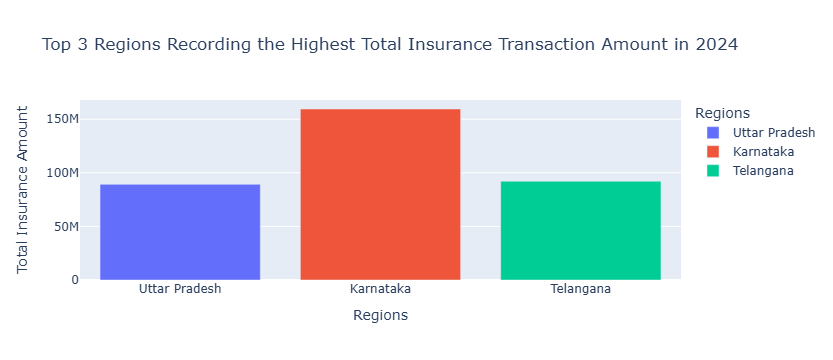

In [194]:
df_high_total_trans_region = df_high_total_trans_region.sample(frac = 1).reset_index(drop = True)
fig14 = px.bar(df_high_total_trans_region, x = "State", y = "Total Insurance Amount", 
               color = "State",
               color_discrete_sequence = px.colors.qualitative.Plotly, 
               labels = {"State": "Regions","Total Insurance Amount":"Total Insurance Amount"},
               title = "Top 3 Regions Recording the Highest Total Insurance Transaction Amount in 2024")
fig14.show()

**Observations**

- Among the different regions within India, the top 3 regions are Telangana, Karnataka and Uttar Pradesh that record the highest total insurance transaction amount in 2024.
- Karnataka with the highest total amount of 15.95 Cr and Telangana being a distant second with an amount of 9.21 Cr.

**Analysis**

- The observation is understandable as Karnataka, especially Bengaluru is the country's tech hub - has a highly educated, well-to-do and digitally savvy population who are more likely to purchase insurance and investment products through PhonePe thereby resulting in higher insurance transaction amount.
- Karnataka has consistently led in digital payments volume and adoption, making it a fertile ground for ancillary financial products such as insurance. PhonePe's deep market penetration with local insurers further fuel growth in Karnataka.
- Uttar Pradesh's large population and increasing financial inclusion efforts have led to substantial growth in insurance product uptake via PhonePe, but relatively low per-capita transaction amounts still trail Karnataka due to broader economic disparities.

#### b. Which year and quarter combinations saw the highest total insurance transaction volume?

In [98]:
query15 = text("""SELECT year, quarter, total_insurance_trans_volume FROM (
                  SELECT year, quarter, SUM(insurance_amount) AS total_insurance_trans_volume,
                  RANK() OVER (PARTITION BY year ORDER BY SUM(insurance_amount) DESC) AS rnk
                  FROM top_ins GROUP BY year, quarter) ranked
                  WHERE rnk = 1;""")

with engine.connect() as conn:
    df_y_q_high_trans = pd.read_sql(query15, conn)

df_y_q_high_trans = df_y_q_high_trans.rename(columns = {"year":"Year","quarter":"Quarter",
                                                        "total_insurance_trans_volume":"Total Insurance Trans Volume"})

display(df_y_q_high_trans)

,Year,Quarter,Total Insurance Trans Volume
0,2020,4,25070767.0
1,2021,4,95183624.0
2,2022,4,206929665.0
3,2023,4,277187253.0
4,2024,4,343694698.0


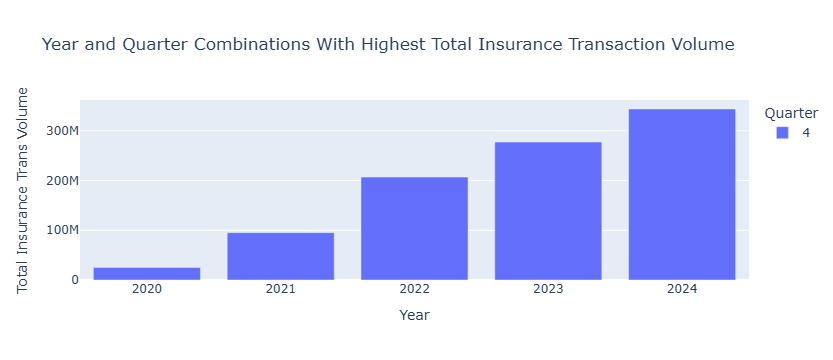

In [147]:
# converting quarters to strings so that they are treated as categories and not integers
df_y_q_high_trans["Quarter"] = df_y_q_high_trans["Quarter"].astype(str)
fig15 = px.bar(df_y_q_high_trans, x = "Year", y = "Total Insurance Trans Volume",
               color = "Quarter", 
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"State": "State","Total Insurance Trans Volume":"Total Insurance Trans Volume","Quarter":"Quarter"},
               title = "Year and Quarter Combinations With Highest Total Insurance Transaction Volume")
fig15.show()

**Observations**

- We can see that in each year, Quarter 4 has the highest total insurance transaction volume with the amount increasing every year.

**Analysis**

- This is understandable as the 4th quarter typically coincides with some major festivities in India such as Diwali, Christmas and New Year's Eve celebrations alongside year-end financial planning, bonus payouts, and tax-saving investments, prompting individuals to purchase or renew insurance policies to meet financial goals and leverage avaiable incentives.
- Moreover, PhonePe's intensive marketing campaigns, limited-time offers and partnerships during this period to capitalize on heightened consumer activity results in a surge in insurance transactions every year during Q4.

#### c. Top 5 Districts with Highest Total Insurance Transaction Volume in 2024

In [148]:
query16 = text("""SELECT district_name, SUM(insurance_amount) AS total_insurance_value
                  FROM map_ins WHERE year = 2024
                  GROUP BY district_name
                  ORDER BY total_insurance_value DESC
                  LIMIT 5;""")

with engine.connect() as conn:
    df_top5_districts_ins = pd.read_sql(query16, conn)

df_top5_districts_ins = df_top5_districts_ins.rename(columns = {"district_name":"District Name", 
                                                                  "total_insurance_value":"Total Insurance Volume"})
display(df_top5_districts_ins)

,District Name,Total Insurance Volume
0,Bengaluru Urban District,584075839.0
1,Pune District,205427182.0
2,Chennai District,130200666.0
3,Rangareddy District,117375694.0
4,Jaipur District,106998743.0


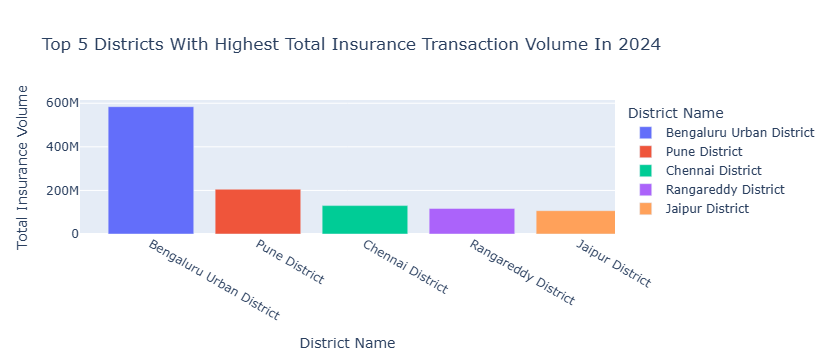

In [154]:
fig16 = px.bar(df_top5_districts_ins, x = "District Name", y = "Total Insurance Volume",
               color = "District Name",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"District Name":"District Name","Total Insurance Volume":"Total Insurance Volume"},
               title = "Top 5 Districts With Highest Total Insurance Transaction Volume In 2024")
fig16.show()

**Observations**

- The top 5 districts with the highest total insurance transaction volume in 2024 are: Bengaluru, Pune, Chennai, Rangareddy and Jaipur.
- Amongst the districts, Bengaluru has the highest total insurance transaction volume of 58.41 Cr compared to the other 4 districts which are far lower in volume.

**Analysis**

- The constant presence of districts within Karnataka such as Bengaluru Urban reiterates the fact that it has a large, high-income, tech-savvy population who are well-educated and financially literate with higher disposable incomes, making them more likely to purchase insurance policies digitally and in large amounts.
- Many companies in Bengaluru encourage or provide insurance options as part of employment compensation packages, increasing both awareness and uptake of insured products.
- PhonePe often prioritize Bengaluru for launching new products and running targetted promotion campaigns, leveraging its large, engaged user base.

#### d. Top 5 Pincodes with Highest Growth in Insurance Transaction Count in 2024

In [155]:
query17 = text("""WITH yearly_pin_data AS (
                  SELECT pincode, year, SUM(insurance_count) AS yearly_transaction_count
                  FROM top_ins GROUP BY pincode, year),
                  growth_calc AS (
                  SELECT p1.pincode, (p2.yearly_transaction_count - p1.yearly_transaction_count) AS growth_in_count,
                  p2.year
                  FROM yearly_pin_data p1
                  JOIN yearly_pin_data p2
                  ON p1.pincode = p2.pincode
                  AND p2.year = p1.year + 1)
                  SELECT pincode, growth_in_count AS growth_from_prev_year
                  FROM growth_calc
                  WHERE year = 2024
                  ORDER BY growth_from_prev_year DESC
                  LIMIT 5;""")

with engine.connect() as conn:
    df_pincode_ins_trans = pd.read_sql(query17, conn)

df_pincode_ins_trans = df_pincode_ins_trans.rename(columns = {"pincode":"Pincode",
                                                              "growth_from_prev_year":"Growth From Prev Year"})

df_pincode_ins_trans["Pincode"] = df_pincode_ins_trans["Pincode"].astype(int)
df_pincode_ins_trans["Growth From Prev Year"] = df_pincode_ins_trans["Growth From Prev Year"].astype(int)

display(df_pincode_ins_trans)

,Pincode,Growth From Prev Year
0,560103,4530
1,560091,4480
2,452001,3029
3,401208,2728
4,302012,2711


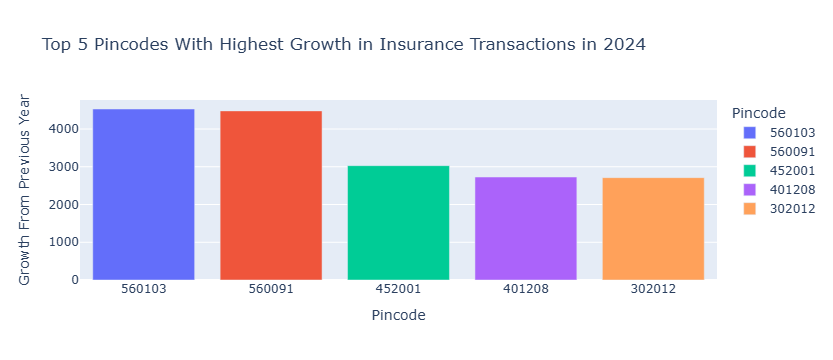

In [160]:
# converting the pincodes to strings so that they are treated as categories and not integers
df_pincode_ins_trans["Pincode"] = df_pincode_ins_trans["Pincode"].astype(str) 
fig17 = px.bar(df_pincode_ins_trans, x = "Pincode", y = "Growth From Prev Year", 
               color = "Pincode",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"Pincode":"Pincode","Growth From Prev Year":"Growth From Previous Year"},
               title = "Top 5 Pincodes With Highest Growth in Insurance Transactions in 2024")
fig17.show()

**Observations**

- From the plot above, we can see that the postal codes: 560103, 560091, 452001, 401208, 302012 have the highest growth in insurance transactions in 2024 with postal code 560103 being the highest, seeing a growth of about 4530 units from the previous year.

**Analysis**

- These postal codes belong to prominent urban and suburban cities like Bengaluru (560103, 560091), Indore (452001), Mumbai suburban region (401208) and Jaipur (302102)
- These regions have higher concentration of working professionals, wealthier residents and a strong digital adoption culture fueling rapid insurance uptake through PhonePe.
- It is also likely that PhonePe actively focused its marketing and outreach efforts in these postal codes, tapping into neighbourhoods known for early tech adoption and openness to digital financial products.
- Postal codes such as 560103, which corresponds to the Belandur area in Bengaluru, are hubs for IT parks, tech campuses, and newly developed residential complexes, leading to a surge in new residents. As people relocate or find new jobs, insurance purchases, especially health, life or property - often spike as part of onboarding financial planning.

### Creating the Interactive Streamlit Dashboard

In [301]:
%%writefile business_data.py

# Importing the necessary files 

from sqlalchemy import create_engine, text
import pandas as pd
import plotly.express as px

# Setting up the MySQL environment
username = 'root'
password = 'Sid%40SQL2023'
host = 'localhost'
port = 3306
database = 'phonepe_db'
connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

# Query 1

query1 = text("""SELECT Year, SUM(Transaction_count) AS 'Total Number of Transactions', 
              SUM(Transaction_amount) AS 'Total Transaction Amount' 
              FROM agg_trans 
              GROUP BY Year 
              ORDER BY Year;""")

with engine.connect() as conn:
    df_trans_value_growth = pd.read_sql(query1, conn)

df_trans_value_growth["Transaction Number Growth (%)"] = df_trans_value_growth["Total Number of Transactions"].pct_change()*100
df_trans_value_growth["Transaction Amount Growth (%)"] = df_trans_value_growth["Total Transaction Amount"].pct_change()*100

import plotly.express as px 
df_trans_value_growth_fil = df_trans_value_growth[df_trans_value_growth["Year"]!=2018]
fig1 = px.bar(df_trans_value_growth_fil, x = "Year", y = ["Transaction Number Growth (%)","Transaction Amount Growth (%)"],
             barmode = "group", labels = {"value":"Values", "variable":"Metric", "Year":"Year"}, 
             title = "Growth in Transaction Volume Over Years",
             color_discrete_sequence = ["#636EFA","#EF553B"])

fig1.update_xaxes(tickmode = "array", tickvals = [2019, 2020, 2021, 2022, 2023, 2024], 
                  ticktext = ["2019","2020","2021","2022","2023","2024"])
fig1.update_yaxes(tickformat = ",")

# Query 2 

query2 = text("""WITH YoYGrowth AS (
                 SELECT State, Year, 
                 ROUND((SUM(Transaction_count) - LAG(SUM(Transaction_count)) OVER (PARTITION BY State ORDER BY Year)) * 100.0 /
                 NULLIF(LAG(SUM(Transaction_count)) OVER (PARTITION BY State ORDER BY Year), 0), 2) AS YoY_Transaction_Growth_Percent
                 FROM agg_trans
                 GROUP BY State, Year),
                 RankedGrowth AS (
                 SELECT State, Year, YoY_Transaction_Growth_Percent, ROW_NUMBER() OVER (PARTITION BY Year ORDER BY YoY_Transaction_Growth_Percent DESC) AS rn_desc, 
                 ROW_NUMBER() OVER (PARTITION BY Year ORDER BY YoY_Transaction_Growth_Percent ASC) AS rn_asc
                 FROM YoYGrowth
                 WHERE YoY_Transaction_Growth_Percent IS NOT NULL),
                 TopBottomStates AS (
                 SELECT DISTINCT State FROM RankedGrowth WHERE rn_desc <= 3 OR rn_asc <= 3)
                 SELECT yg.State, AVG(yg.YoY_Transaction_Growth_Percent) as 'Average Transaction Growth Percent'
                 FROM YoYGrowth yg
                 JOIN TopBottomStates tbs ON yg.State = tbs.State
                 WHERE Year >= 2019
                 GROUP BY State
                 ORDER BY AVG(yg.YoY_Transaction_Growth_Percent) DESC
                 LIMIT 5;""")

with engine.connect() as conn:
    df_state_yoy_growth = pd.read_sql(query2, conn)

df_state_yoy_growth.fillna(0, inplace = True)

fig2 = px.bar(df_state_yoy_growth, x = "State", y = "Average Transaction Growth Percent",
              color = "State",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"Average Transaction Growth Percent": "Average Transaction Growth (%)",
                         "State":"State"}, title = "Top 5 States with Highest Average Year on Year Transaction Growth")
fig2.update_layout(height = 500)

# Query 3

query3 = text("""WITH state_year_summary AS (
                 SELECT State, Year, SUM(Transaction_count) AS TotalTransactions
                 FROM agg_trans WHERE Year BETWEEN 2020 AND 2024 
                 GROUP BY State, Year),
                 growth AS (
                 SELECT s.State, s.Year, s.TotalTransactions, 
                 LAG(s.TotalTransactions) OVER (PARTITION BY s.State ORDER BY s.Year) AS PreviousYearTransactions
                 FROM state_year_summary s),
                 declining_states AS (
                 SELECT State, ROUND((TotalTransactions - PreviousYearTransactions) * 100.0 / PreviousYearTransactions, 2)
                 AS YoY_Transaction_Growth_Percent
                 FROM growth
                 WHERE PreviousYearTransactions IS NOT NULL
                 AND Year = 2024
                 ORDER BY YoY_Transaction_Growth_Percent ASC
                 LIMIT 5)
                 SELECT g.State, g.Year, ROUND((g.TotalTransactions - g.PreviousYearTransactions) * 100.0 / g.PreviousYearTransactions,2)
                 AS "YoY Transaction Growth (%)"
                 FROM growth g
                 JOIN declining_states d ON g.State = d.State
                 WHERE g.PreviousYearTransactions IS NOT NULL
                 ORDER BY g.State, g.Year;""")

with engine.connect() as conn:
    df_trans_growth_decline = pd.read_sql(query3, conn)

fig3 = px.line(df_trans_growth_decline, x = "Year", y = "YoY Transaction Growth (%)", color = "State",
               markers = True,
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"State":"Regions","YoY Transaction Growth (%)":"YoY Transaction Growth (%)"},
               title = "Top 5 Regions Showing Most Decline in Transaction Growth from 2021-2024")
fig3.update_xaxes(tickmode = "array", tickvals = [2019, 2020, 2021, 2022, 2023, 2024], 
                  ticktext = ["2019","2020","2021","2022","2023","2024"])
fig3.update_traces(mode = "lines + markers", marker = dict(size = 6))

# Query 4 

query4 = text("""WITH quarterly AS (
              SELECT Year, Quarter, SUM(Transaction_count) AS TotalTransactions
              FROM agg_trans
              WHERE Year BETWEEN 2018 AND 2024
              GROUP BY Year, Quarter),
              with_prev AS (
              SELECT Year, Quarter, TotalTransactions, LAG(TotalTransactions) OVER (ORDER BY Year, Quarter) AS PrevTotalTransactions,
              CASE
               WHEN LAG(TotalTransactions) OVER (ORDER BY Year, Quarter) IS NULL THEN NULL
               WHEN LAG(TotalTransactions) OVER (ORDER BY Year, Quarter) = 0 THEN NULL
               ELSE (TotalTransactions - LAG(TotalTransactions) OVER (ORDER BY Year, Quarter)) * 100.0 / LAG(TotalTransactions) OVER (ORDER BY Year, Quarter)
              END AS TransactionSpikePct
              FROM quarterly)
              SELECT Year, Quarter AS 'Quarter With Max Pct Spike', TotalTransactions as 'Total Transactions', 
              PrevTotalTransactions as 'Prev Total Transactions', ROUND(TransactionSpikePct,2) AS 'Spike Pct'
              FROM (SELECT *,
              ROW_NUMBER() OVER (PARTITION BY Year ORDER BY CASE WHEN TransactionSpikePct IS NULL THEN 1 ELSE 0 END, TransactionSpikePct DESC) 
              AS rn
              FROM with_prev) t
              WHERE rn = 1
              ORDER BY Year;""")

with engine.connect() as conn:
    df_quarter_spike = pd.read_sql(query4, conn)

df_quarter_spike["Quarter With Max Pct Spike"] = df_quarter_spike["Quarter With Max Pct Spike"].astype(str)
fig4 = px.bar(df_quarter_spike, x = "Year", y = "Spike Pct", color = "Quarter With Max Pct Spike",
              labels = {"Year":"Year","Spike Pct":"Transaction Spike (%)","Quarter With Max Pct Spike":"Quarter"},
              color_discrete_sequence = px.colors.qualitative.Plotly,
              title = "Quarters with Highest Transaction Spike in Each Year")

# Query 5

query5 = text("""WITH yearly_totals AS (
                 SELECT Year, SUM(Transaction_amount) AS TotalTransactionAmount
                 FROM agg_trans
                 GROUP BY Year),
                 type_share AS (
                 SELECT a.Year, a.Transaction_type AS TransactionType, SUM(a.Transaction_amount) AS TransactionAmount,
                 SUM(a.Transaction_amount) * 100.0 / y.TotalTransactionAmount AS SharePct
                 FROM agg_trans a
                 JOIN yearly_totals y ON a.Year = y.Year
                 GROUP BY a.Year, a.Transaction_type, y.TotalTransactionAmount)
                 SELECT TransactionType AS "Transaction Type", ROUND(AVG(SharePct), 2) AS "Average Share Pct"
                 FROM type_share
                 GROUP BY TransactionType;""")

with engine.connect() as conn:
    df_trans_type_high_share = pd.read_sql(query5, conn)

fig5 = px.pie(df_trans_type_high_share, names = "Transaction Type", values = "Average Share Pct", 
              color = "Transaction Type",
              color_discrete_sequence = px.colors.qualitative.Plotly,
              title = "Percentage Share of All Transactions By Each Payment Type")

fig5.update_traces(textposition = "outside", pull = 0.1)
fig5.update_layout(width = 600, height = 500, uniformtext_minsize = 14, uniformtext_mode = "show")

# Query 6

query6 = text("""WITH brand_users AS (
                 SELECT Brand_name AS Brandname, SUM(User_count) AS Totalusers 
                 FROM agg_user
                 GROUP BY Brand_name),
                 ranked AS (
                 SELECT Brandname, Totalusers,
                 RANK() OVER (ORDER BY Totalusers DESC) AS rank_highest,
                 RANK() OVER (ORDER BY Totalusers ASC) AS rank_lowest
                 FROM brand_users)
                 SELECT Brandname, Totalusers 
                 FROM ranked 
                 WHERE rank_highest <= 3 OR rank_lowest <= 3
                 ORDER BY Totalusers DESC;""")

with engine.connect() as conn:
    df_device_brand_users = pd.read_sql(query6, conn)

df_device_brand_users = df_device_brand_users.rename(columns = {"Brandname":"Brand Name", 
                                                                "Totalusers":"Total Users"})
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top3_df = df_device_brand_users.iloc[0:3]
bottom3_df = df_device_brand_users.iloc[3:]

palette = px.colors.qualitative.Plotly

top3_colors = [palette[i % len(palette)] for i in range(len(top3_df))]
bottom3_colors = [palette[i % len(palette)] for i in range(len(bottom3_df))]

fig6 = make_subplots(rows = 1, cols = 2, subplot_titles = ("Top 3 Mobile Brands",
                                                           "Bottom 3 Mobile Brands"))
fig6.add_trace(go.Bar(x = top3_df["Brand Name"], y = top3_df["Total Users"],
                      marker_color = top3_colors), row = 1, col = 1)
fig6.add_trace(go.Bar(x = bottom3_df["Brand Name"], y = bottom3_df["Total Users"],
                     marker_color = bottom3_colors), row = 1, col = 2)

fig6.update_layout(title_text = "Total Number of PhonePe Users For Each Device Brand", showlegend = False)

# Query 7

query7 = text("""WITH app_engagement AS (
                SELECT State AS "State", ROUND(AVG(Registered_users), 2) AS AvgRegUsers, ROUND(AVG(Number_of_app_opens), 2) AS AvgAppOpens
                FROM map_user
                GROUP BY State),
                engagement_rate AS (
                SELECT State, ROUND(AvgAppOpens / AvgRegUsers, 2) AS EngagementRate 
                FROM app_engagement)
                (SELECT * FROM engagement_rate
                ORDER BY EngagementRate DESC
                LIMIT 3)
                UNION ALL
                (SELECT * FROM engagement_rate ORDER BY EngagementRate ASC LIMIT 3)
                ORDER BY EngagementRate DESC;""")

with engine.connect() as conn:
    df_state_user_eng_rate = pd.read_sql(query7, conn)

df_state_user_eng_rate = df_state_user_eng_rate.rename(columns = {"EngagementRate":"Engagement Rate"})

top3_eng = df_state_user_eng_rate.iloc[0:3]
bottom3_eng = df_state_user_eng_rate.iloc[3:]

palette = px.colors.qualitative.Plotly

top3_colors = [palette[i % len(palette)] for i in range(len(top3_eng))]
bottom3_colors = [palette[i % len(palette)] for i in range(len(bottom3_eng))]

fig7 = make_subplots(rows = 1, cols = 2, subplot_titles = ("Top 3 States",
                                                           "Bottom 3 States"))
fig7.add_trace(go.Bar(x = top3_eng["State"], y = top3_eng["Engagement Rate"],
                      marker_color = top3_colors), row = 1, col = 1)
fig7.add_trace(go.Bar(x = bottom3_eng["State"], y = bottom3_eng["Engagement Rate"],
                     marker_color = bottom3_colors), row = 1, col = 2)

fig7.update_layout(title_text = "PhonePe App Engagement Rates For Each State", showlegend = False)

# Query 8

query8 = text("""WITH quarterly_engagement AS (
                 SELECT Year, Quarter, ROUND(SUM(Number_of_app_opens)/SUM(Registered_users), 4) AS EngagementRate
                 FROM map_user
                 GROUP BY Year, Quarter),
                 ranked AS (
                 SELECT Year, Quarter, EngagementRate,
                 RANK() OVER (PARTITION BY Year ORDER BY EngagementRate DESC) AS rank_highest,
                 RANK() OVER (PARTITION BY Year ORDER BY EngagementRate ASC) AS rank_lowest
                 FROM quarterly_engagement)
                 SELECT Year, Quarter, EngagementRate as 'Engagement Rate' FROM ranked
                 WHERE rank_highest = 1 OR rank_lowest = 1
                 ORDER BY Year, Quarter, EngagementRate ASC;""")

with engine.connect() as conn:
    df_quarter_user_eng_rate = pd.read_sql(query8, conn)

df_quarter_user_eng_rate = df_quarter_user_eng_rate[df_quarter_user_eng_rate["Year"]!=2018]
df_quarter_user_eng_rate["Quarter"] = df_quarter_user_eng_rate["Quarter"].astype(str)
df_quarter_user_eng_rate = df_quarter_user_eng_rate.sort_values(["Year","Engagement Rate"], ascending = [True, True])
fig8 = px.bar(df_quarter_user_eng_rate, x = "Year", y = "Engagement Rate",
             barmode = "group", labels = {"Year":"Year", "Quarter":"Quarter", "Engagement Rate":"Engagement Rate"}, 
             color = "Quarter",
             color_discrete_sequence = px.colors.qualitative.Plotly,
             title = "Highest and Lowest PhonePe App User Engagement Rate Per Year")

# Query 9

query9 = text("""WITH yearly_insurance AS (
                 SELECT Year, SUM(Insurance_count) AS TotalInsurance, SUM(Insurance_amount) AS TotalValue
                 FROM agg_ins
                 WHERE Year BETWEEN 2020 AND 2024
                 GROUP BY Year),
                 growth AS (
                 SELECT Year, TotalInsurance, TotalValue, LAG(TotalInsurance) OVER (ORDER BY Year) AS PrevTransactions,
                 LAG(TotalValue) OVER (ORDER BY Year) AS PrevValue
                 FROM yearly_insurance)
                 SELECT Year, TotalInsurance as "No of Insurance Transactions", TotalValue "Total Insurance Amount",
                 ROUND((TotalInsurance - PrevTransactions) * 100.0 / PrevTransactions, 2) AS "Insurance Transaction Growth (%)",
                 ROUND((TotalValue - PrevValue) * 100.0 / PrevValue, 2) AS "Insurance Amount Growth (%)"
                 FROM growth
                 WHERE PrevTransactions IS NOT NULL AND PrevValue IS NOT NULL
                 ORDER BY Year;""")

with engine.connect() as conn:
    df_ins_growth_each_year = pd.read_sql(query9, conn)

fig9 = px.bar(df_ins_growth_each_year, x = "Year", y = ["Insurance Transaction Growth (%)", "Insurance Amount Growth (%)"],
              barmode = "group",
              color_discrete_sequence = px.colors.qualitative.Plotly,
              labels = {"Year":"Year","Insurance Transaction Growth (%)":"Insurance Transaction Growth (%)",
                        "Insurance Amount Growth (%)":"Insurance Amount Growth (%)","variable":"Metric", 
                        "value":"Growth (%)"},
             title = "Growth in Number Of Transactions and Total Insurance Transactions Over The Years")

# Query 10

query10 = text("""WITH yearly_totals AS (
                  SELECT State, Year, SUM(Insurance_amount) AS total_value FROM agg_ins
                  GROUP BY state, year)
                  SELECT State, (MAX(total_value) - MIN(total_value)) AS InsuranceTransactionValue
                  FROM yearly_totals
                  GROUP BY state
                  ORDER BY InsuranceTransactionValue DESC
                  LIMIT 5;""")

with engine.connect() as conn:
    df_high_insurance_trans = pd.read_sql(query10, conn)

df_high_insurance_trans["InsuranceTransactionValue"] = df_high_insurance_trans["InsuranceTransactionValue"]/1e7

df_high_insurance_trans = df_high_insurance_trans.rename(columns = 
                                                         {"InsuranceTransactionValue":"Insurance Transaction Value (in Cr)"})

fig10 = px.bar(df_high_insurance_trans, x = "State", y = "Insurance Transaction Value (in Cr)",
               color = "State",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"State":"State","Insurance Transaction Value (in Cr)":"Insurance Transaction Value (in Cr)"},
               title = "Top 5 States with Highest Insurance Transaction Value Over The Years")

# Query 11

query11 = text("""WITH total_activity AS (
                  SELECT state, SUM(Transaction_count) AS total_txn_count, SUM(Transaction_amount) AS total_txn_value
                  FROM agg_trans
                  GROUP BY state),
                  insurance_activity AS (
                  SELECT State, SUM(Insurance_count) AS total_insurance_count, SUM(Insurance_amount) AS total_insurance_value
                  FROM agg_ins
                  GROUP BY State),
                  combined AS (
                  SELECT t.State, t.total_txn_count, t.total_txn_value, i.total_insurance_count, i.total_insurance_value,
                  ROUND((i.total_insurance_count * 100.0 / NULLIF(t.total_txn_count, 0)), 5) AS insurance_penetration_rate,
                  ROUND((i.total_insurance_value * 100.0 / NULLIF(t.total_txn_value, 0)), 5) AS insurance_value_share
                  FROM total_activity t
                  LEFT JOIN insurance_activity i ON t.state = i.state)
                  SELECT State, total_txn_count as 'Total Transactions', total_txn_value as 'Total Transaction Amount', 
                  total_insurance_count as 'Total Insurances', total_insurance_value as 'Total Insurance Amount', 
                  insurance_penetration_rate as "Insurance Penetration Rate", 
                  insurance_value_share as "Insurance Value Share"
                  FROM combined
                  WHERE insurance_penetration_rate IS NOT NULL
                  ORDER BY insurance_penetration_rate ASC
                  limit 5;""")

with engine.connect() as conn:
    df_untapped_region = pd.read_sql(query11, conn)

fig11 = px.bar(df_untapped_region, x = "State", y = ["Insurance Penetration Rate"], 
               color = 'State',
               color_discrete_sequence = px.colors.qualitative.Plotly, 
               labels = {"State": "State","variable": "Metric","value": "Insurance Penetration Rate"},
               title = "Untapped States - High Total Transaction Values But Relatively Low Insurance Penetration")

# Query 12

query12 = text("""WITH yearly_user_growth AS (
                  SELECT state, year, SUM(Registered_users) AS yearly_registered
                  FROM map_user
                  GROUP BY state, year),
                  user_growth_rate AS (
                  SELECT state, year, yearly_registered, LAG(yearly_registered) OVER (PARTITION BY state ORDER BY year) AS prev_registered,
                  ROUND((yearly_registered - LAG(yearly_registered) OVER (PARTITION BY state ORDER BY year)) * 100.0 / LAG(yearly_registered) OVER (PARTITION BY state ORDER BY year), 2) AS reg_growth_pct
                  FROM yearly_user_growth),
                  yearly_txn_growth AS (
                  SELECT state, year, SUM(transaction_count) AS yearly_txns
                  FROM agg_trans GROUP BY state, year),
                  txn_growth_rate AS (
                  SELECT state, year, yearly_txns, LAG(yearly_txns) OVER (PARTITION BY state ORDER BY year) AS prev_txns,
                  ROUND((yearly_txns - LAG(yearly_txns) OVER (PARTITION BY state ORDER BY year)) * 100.0 / LAG(yearly_txns) OVER (PARTITION BY state ORDER BY year), 2) AS txn_growth_pct
                  FROM yearly_txn_growth),
                  combined AS (
                  SELECT u.state, u.year, u.reg_growth_pct, t.txn_growth_pct FROM user_growth_rate u
                  JOIN txn_growth_rate t 
                  ON u.state = t.state AND u.year = t.year
                  WHERE u.prev_registered IS NOT NULL AND t.prev_txns IS NOT NULL)
                  SELECT state, ROUND(AVG(reg_growth_pct), 2) AS avg_user_growth_pct, 
                  ROUND(AVG(txn_growth_pct), 2) AS avg_txn_growth_pct
                  FROM combined GROUP BY state HAVING AVG(reg_growth_pct) > 0 AND AVG(txn_growth_pct) > 0
                  ORDER BY avg_txn_growth_pct DESC LIMIT 10;""")

with engine.connect() as conn:
    df_state_consistent_growth = pd.read_sql(query12, conn)

df_state_consistent_growth = df_state_consistent_growth.rename(columns = {"state":"State", 
                                                                          "avg_user_growth_pct":"Average User Growth (%)",
                                                                          "avg_txn_growth_pct":"Average Transaction Growth (%)"})

fig12 = px.bar(df_state_consistent_growth, x = "State", y = ["Average User Growth (%)", "Average Transaction Growth (%)"], 
               barmode = "group", color_discrete_sequence = px.colors.qualitative.Plotly, 
               labels = {"State": "State","variable": "Metric","value": "Growth (%)"},
               title = "States Showing Consistent Growth in User Registration and Repeat Transaction")

# Query 13

query13 = text("""WITH district_metrics AS (
                  SELECT State, District_name, SUM(Registered_users) AS total_registered_users,
                  SUM(Number_of_app_opens) AS total_app_opens
                  FROM map_user
                  GROUP BY State, District_name),
                  state_totals AS (
                  SELECT State, SUM(total_registered_users) AS state_total_registered,
                  SUM(total_app_opens) AS state_total_app_opens
                  FROM district_metrics
                  GROUP BY State),
                  joined_data AS (
                  SELECT dm.State, dm.District_name, dm.total_registered_users, dm.total_app_opens,
                  ROUND((dm.total_app_opens / st.state_total_app_opens) * 100, 2) AS app_open_share_percent
                  FROM district_metrics dm 
                  JOIN state_totals st ON dm.State = st.State),
                  state_ranking AS (
                  SELECT State, SUM(total_registered_users) AS state_registered_users
                  FROM district_metrics
                  GROUP BY State),
                  top3_states AS (
                  SELECT State FROM state_ranking ORDER BY state_registered_users DESC LIMIT 3),
                  ranked_districts AS (
                  SELECT jd.*, ROW_NUMBER() OVER (PARTITION BY State ORDER BY total_registered_users DESC) AS district_rank
                  FROM joined_data jd
                  WHERE jd.State IN (SELECT State FROM top3_states))
                  SELECT State, District_name AS 'District Name', total_app_opens AS 'Total App Opens',
                  app_open_share_percent AS 'App Open Share'
                  FROM ranked_districts
                  WHERE district_rank <= 5
                  ORDER BY State, district_rank;""")

with engine.connect() as conn:
    df_district_metrics = pd.read_sql(query13, conn)

import plotly.express as px

state_pie_charts = {}
states = df_district_metrics['State'].unique()

for state in states:
    df_state = df_district_metrics[df_district_metrics['State'] == state]
    
    fig13 = px.pie(
        df_state,
        values = 'App Open Share',
        names = 'District Name',
        title = f'App Open Share Percent for {state}',
        hole = 0.3 
    )
    fig13.update_traces(textposition ='inside', textinfo='percent+label')
    state_pie_charts[state] = fig13

# Query 14

query14 = text("""WITH state_insurance AS (
                  SELECT state, SUM(insurance_amount) AS total_insurance_amount FROM top_ins 
                  WHERE year = 2024
                  GROUP BY state)
                  SELECT state, ROUND(total_insurance_amount, 2) AS total_insurance_amount
                  FROM state_insurance 
                  ORDER BY total_insurance_amount DESC 
                  LIMIT 3;""")

with engine.connect() as conn:
    df_high_total_trans_region = pd.read_sql(query14, conn)

df_high_total_trans_region = df_high_total_trans_region.rename(columns = {"state":"State",
                                                                        "total_insurance_amount":"Total Insurance Amount"})

df_high_total_trans_region = df_high_total_trans_region.sample(frac = 1).reset_index(drop = True)
fig14 = px.bar(df_high_total_trans_region, x = "State", y = "Total Insurance Amount", 
               color = "State",
               color_discrete_sequence = px.colors.qualitative.Plotly, 
               labels = {"State": "Regions","Total Insurance Amount":"Total Insurance Amount"},
               title = "Top 3 Regions Recording the Highest Total Insurance Transaction Amount in 2024")

# Query 15

query15 = text("""SELECT year, quarter, total_insurance_trans_volume FROM (
                  SELECT year, quarter, SUM(insurance_amount) AS total_insurance_trans_volume,
                  RANK() OVER (PARTITION BY year ORDER BY SUM(insurance_amount) DESC) AS rnk
                  FROM top_ins GROUP BY year, quarter) ranked
                  WHERE rnk = 1;""")

with engine.connect() as conn:
    df_y_q_high_trans = pd.read_sql(query15, conn)

df_y_q_high_trans = df_y_q_high_trans.rename(columns = {"year":"Year","quarter":"Quarter",
                                                        "total_insurance_trans_volume":"Total Insurance Trans Volume"})

df_y_q_high_trans["Quarter"] = df_y_q_high_trans["Quarter"].astype(str)
fig15 = px.bar(df_y_q_high_trans, x = "Year", y = "Total Insurance Trans Volume",
               color = "Quarter", 
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"State": "State","Total Insurance Trans Volume":"Total Insurance Trans Volume","Quarter":"Quarter"},
               title = "Year and Quarter Combinations With Highest Total Insurance Transaction Volume")

# Query 16

query16 = text("""SELECT district_name, SUM(insurance_amount) AS total_insurance_value
                  FROM map_ins WHERE year = 2024
                  GROUP BY district_name
                  ORDER BY total_insurance_value DESC
                  LIMIT 5;""")

with engine.connect() as conn:
    df_top5_districts_ins = pd.read_sql(query16, conn)

df_top5_districts_ins = df_top5_districts_ins.rename(columns = {"district_name":"District Name", 
                                                                  "total_insurance_value":"Total Insurance Volume"})

fig16 = px.bar(df_top5_districts_ins, x = "District Name", y = "Total Insurance Volume",
               color = "District Name",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"District Name":"District Name","Total Insurance Volume":"Total Insurance Volume"},
               title = "Top 5 Districts With Highest Total Insurance Transaction Volume In 2024")

# Query 17

query17 = text("""WITH yearly_pin_data AS (
                  SELECT pincode, year, SUM(insurance_count) AS yearly_transaction_count
                  FROM top_ins GROUP BY pincode, year),
                  growth_calc AS (
                  SELECT p1.pincode, (p2.yearly_transaction_count - p1.yearly_transaction_count) AS growth_in_count,
                  p2.year
                  FROM yearly_pin_data p1
                  JOIN yearly_pin_data p2
                  ON p1.pincode = p2.pincode
                  AND p2.year = p1.year + 1)
                  SELECT pincode, growth_in_count AS growth_from_prev_year
                  FROM growth_calc
                  WHERE year = 2024
                  ORDER BY growth_from_prev_year DESC
                  LIMIT 5;""")

with engine.connect() as conn:
    df_pincode_ins_trans = pd.read_sql(query17, conn)

df_pincode_ins_trans = df_pincode_ins_trans.rename(columns = {"pincode":"Pincode",
                                                              "growth_from_prev_year":"Growth From Prev Year"})

df_pincode_ins_trans["Pincode"] = df_pincode_ins_trans["Pincode"].astype(int)
df_pincode_ins_trans["Growth From Prev Year"] = df_pincode_ins_trans["Growth From Prev Year"].astype(int)

df_pincode_ins_trans["Pincode"] = df_pincode_ins_trans["Pincode"].astype(str) 
fig17 = px.bar(df_pincode_ins_trans, x = "Pincode", y = "Growth From Prev Year", 
               color = "Pincode",
               color_discrete_sequence = px.colors.qualitative.Plotly,
               labels = {"Pincode":"Pincode","Growth From Prev Year":"Growth From Previous Year"},
               title = "Top 5 Pincodes With Highest Growth in Insurance Transactions in 2024")

fig17.update_layout(xaxis_type = "category", bargap = 0.2)

Overwriting business_data.py


In [320]:
%%writefile app.py 

# Importing the necessary libraries 

import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sqlalchemy import create_engine, text
import requests

# Styling the app

st.set_page_config(page_title="PhonePe Business Analysis", layout = "wide") # setting up the page by giving it a title and a wide configuration
phonepe_violet = "#1E0E3F" # app color
st.markdown(f"<style>.stApp{{background-color: {phonepe_violet};}}</style>", unsafe_allow_html = True) # background color for the app which is violet
st.sidebar.markdown("""
<style>
[data-testid="stSidebar"]{background-color: #2D174B;}
[data-testid="stSidebar"] label{
font-weight:bold !important;
font-size:1.15em !important;
color:white !important;
}
</style>
""", unsafe_allow_html = True) # a custom CSS code to customize the sidebars 

def create_styled_table(df, col1, col2, title, col1_width=340, col2_width=130): # code which will be used later on to create styled tables to display the figures in the EXPLORE DATA section
    fig = go.Figure(data=[
        go.Table(
            header=dict(
                values=[f"<b>{col1}</b>", f"<b>{col2}</b>"], # sets the values by referencing columns in the code below
                fill_color="#4B367C", # the color of the table 
                font=dict(color="white", size=16), # font to be used in the table
                align="left", # alignment of header
                line_color="#322454",
                line_width=2),
            cells=dict(
                values=[
                    df[col1].astype(str), # converting values to str in the first column
                    df[col2].apply(lambda x: f"{int(x):,}" if col2.lower() != "pincode" else x)], # converting the values to integers only if the column name is not pincode otherwise it would provide stylistic numbers '400,500' instead of '400500' which is more appropriate for pincodes.
                fill_color=[["#2D174B", "#341E56"] * (len(df)//2 + 1)],
                font=dict(color="white", size=15),
                align="left",
                line_color="#322454",
                line_width=1,
                height=30),
            columnwidth=[col1_width, col2_width])])
    fig.update_layout(
        paper_bgcolor="#1E0E3F",
        margin=dict(l=8, r=8, t=40, b=8), # define the margins 
        height=400, # define the height 
        title=dict(text=f"<b>{title}</b>", font=dict(size=22, color="white")))
    return fig

# Sidebar navigation
r = st.sidebar.radio('NAVIGATION', ['HOME', 'EXPLORE DATA', 'BUSINESS CASES']) # Users can use this navigation bar to switch between pages of the app

# Home page

if r == 'HOME':
    st.image("C:/Users/Siddhant Iyer/OneDrive/Desktop/PhonePe_Logo.png", width=400) # PhonePe logo on the HOME page
    st.markdown("""
                <div style="text-align:left; margin-top: 1.5rem; margin-bottom: 1.5rem;">
                  <h2 style="font-size: 2.2rem; margin-bottom: 0.5rem;">About</h2>
                  <p style="font-size: 1.15rem; line-height: 1.6; max-width: 800px;">
                    This is a <b>PhonePe Pulse Business Analysis Dashboard</b> designed to analyze
                    key business metrics and surface data‑driven recommendations across India.
                  </p>
                </div>
                """, unsafe_allow_html=True) # CSS code to customize the logo, increase its size, alignment etc
    st.markdown(
                "<hr style='border: 0; height: 1px; background: #5A3F90; margin: 1.5rem 0;'>",
                unsafe_allow_html=True)
    
    st.markdown("<h4>Executive Summary</h4>", unsafe_allow_html = True) # executive summary for PhonePe
    st.markdown("""India’s digital payments ecosystem has undergone a fundamental shift in the last five years, driven by rapid improvements in infrastructure, the rise of UPI, changing customer habits post‑pandemic, 
                   a widening merchant network, and innovative fintech solutions. 
                   Today, roughly 40% of total payment value in the country is routed through digital channels, supporting an estimated US$ 3 trillion digital payments market.""")
    
    st.markdown("""Even with this strong momentum, several pockets of the market are still relatively underserved and offer substantial headroom for expansion. 
                   The strongest incremental growth is expected from Tier 3–6 cities and towns, which have contributed around 60–70% of new mobile payment users in the last couple of years. 
                   Continued growth will be propelled by deeper merchant onboarding, end‑to‑end digitalization of supply chains, and building financial services marketplaces targeted at customers and businesses that have historically had limited access to such products.""")
    
    st.markdown("""The industry is now at an inflection point: projections indicate that the size of India’s digital payments market could more than triple, from about US$ 3 trillion to nearly 10 trillion by 2026. 
                   At that stage, digital (non‑cash) payments are expected to account for close to 65% of all transactions by value, meaning roughly two out of every three rupees spent will move through digital rails. 
                   As this shift plays out, India will effectively operate as a digital payments–first economy, with merchant transactions—especially in offline environments enabled by QR codes—emerging as the primary engine of growth and overtaking peer‑to‑peer transfers.""")

    st.markdown("""However, payment providers across the ecosystem face persistent margin pressure, which is pushing them to lean on higher‑margin products while still nurturing transaction growth. With large, engaged user bases and detailed insight into customer behavior and purchasing patterns, these firms are well placed to broaden their revenue mix by expanding into areas such as credit, savings, and investment facilitation.""")
    
    st.markdown("""Capturing the full US$ 10 trillion potential will require sustained investment in trust and reliability. This includes robust and transparent fraud‑prevention frameworks, simpler and more intuitive digital onboarding and KYC processes, stronger and more scalable banking and payments infrastructure, business models that offer better unit economics for payment providers, and ongoing enhancement of the country’s broader digital backbone.""")
    
    st.markdown("<h4>What can you find here?</h4>", unsafe_allow_html = True) # Providing users a basic understanding of what they can do in this app
    st.markdown("""
                   In this interactive dashboard you will find the following:
                   
                   - Exploration of different PhonePe data from Transactions, Insurance, User Behavior across all states and union territories of India and from years 2018-2024.
                   
                   - In the <b>EXPLORE DATA</b> section, there will be aggregated values such as total transactions or average transaction amount for the selected Year and Quarter combination.
                   
                   - In the <b>BUSINESS CASES</b> section, there will be 5 different business case studies which seek to analyze current trends and patterns in PhonePe transactions and user behavior and provide possible recommendations for each sub-section""",
               unsafe_allow_html = True)

elif r == 'EXPLORE DATA': # EXPLORE DATA section
    st.markdown("<h2 style='color:white;'>Explore Data</h2>", unsafe_allow_html=True)
    
    # Setting up the SQL environment, connecting to MySQL so that the queries can run in the background 
    
    username = 'root'
    password = 'Sid%40SQL2023'
    host = 'localhost'
    port = 3306
    database = 'phonepe_db'
    connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
    engine = create_engine(connection_string) 

    st.sidebar.header("Select Data") # Users can select different data categories 
    dataset_type = st.sidebar.radio("Choose Data Category:", ("Transactions", "Insurance", "Users")) # These are the three categories users can explore 
    table_map = {"Transactions": ("map_trans", "top_trans", "agg_trans"), 
                 "Insurance": ("map_ins", "top_ins", None),
                 "Users": ("map_user", None, None)} # These are the tables which are used for the queries
    map_table, top_table, agg_table = table_map[dataset_type]

    try:
        with engine.connect() as conn:
            years = pd.read_sql(f"SELECT DISTINCT Year FROM {map_table} ORDER BY Year;", conn)["Year"].tolist() 
            quarters = pd.read_sql(f"SELECT DISTINCT Quarter FROM {map_table} ORDER BY Quarter;", conn)["Quarter"].tolist() 
        selected_year = st.sidebar.selectbox("Select Year", years, index=len(years) - 1) # Here users can make the selection
        selected_quarter = st.sidebar.selectbox("Select Quarter", quarters) # Users can select the quarters
        query = text(f"""SELECT * FROM {map_table} WHERE Year = :year AND Quarter = :quarter""") # run the query based on the year and quarter combination user selected
        with engine.connect() as conn:
            df = pd.read_sql(query, conn, params={"year": selected_year, "quarter": selected_quarter})

        st.subheader(f"{dataset_type} Data Overview - {selected_year} Q{selected_quarter}") # Data Overview changes based on the selected year and quarter

        # Metrics
        if dataset_type == "Transactions": # User selects transaction
            total_txn_count = df["Transaction_count"].sum() # provides count of transactions 
            total_txn_amount = df["Transaction_amount"].sum() # total transaction amount
            avg_txn_value = total_txn_amount / total_txn_count if total_txn_count else 0 # calculate average value
            # Create separate columns which will display aggregate values 
            col1, col2, col3 = st.columns(3) 
            col1.metric("All PhonePe Transactions", f"{total_txn_count:,.0f}") 
            col2.metric("Total Transaction Amount", f"₹{format(int(total_txn_amount/1e7),',')} Cr")
            col3.metric("Average Transaction Value", f"₹{avg_txn_value:,.0f}")

        elif dataset_type == "Insurance": # User selects Insurance 
            total_ins_count = df["Insurance_count"].sum() # Insurance transaction count
            total_ins_amount = df["Insurance_amount"].sum() # Insurance amount 
            avg_ins_value = total_ins_amount / total_ins_count if total_ins_count else 0 # Average insurance value 
            # Create separate columns which will display aggregate values 
            col1, col2, col3 = st.columns(3)
            col1.metric("All PhonePe Insurance Transactions", f"{total_ins_count:,.0f}")
            col2.metric("Total Insurance Amount", f"₹{total_ins_amount/1e7:,.0f} Cr")
            col3.metric("Average Insurance Amount", f"₹{avg_ins_value:,.0f}")

        else: # if user selects Users
            total_users = df["Registered_users"].sum() # number of registered users
            total_apps = df["Number_of_app_opens"].sum() # frequency of PhonePe app opens
            col1, col2 = st.columns(2)
            col1.metric("Total Registered Users", f"{(total_users):,.0f}")
            col2.metric("PhonePe App Opens", f"{(total_apps):,.0f}")

        # Columns based on dataset type
        if dataset_type == "Transactions":
            value_column = "Transaction_amount"
        elif dataset_type == "Insurance":
            value_column = "Insurance_amount"
        else:
            value_column = "Registered_users"

        # Payment Categories styled table
        if dataset_type == "Transactions":
            if agg_table:
                with engine.connect() as conn:
                    payment_category_query = text(f"""SELECT Transaction_type AS Transaction_type, SUM(Transaction_amount) AS Total_Value
                                                      FROM {agg_table}
                                                      WHERE Year = :year AND Quarter = :quarter
                                                      GROUP BY Transaction_type
                                                      ORDER BY Total_Value DESC""")
                    category_df = pd.read_sql(payment_category_query, conn, params={"year": selected_year, "quarter": selected_quarter})
                    category_df["Total_Value"] = pd.to_numeric(category_df["Total_Value"].round(0), downcast="integer")
                fig = create_styled_table(category_df, "Transaction_type", "Total_Value", "Payment Categories", 120, 150)
                fig.update_layout(height = 250)
                st.plotly_chart(fig, use_container_width = True)
                        
            else:
                st.warning("Aggregation table for Payment Categories not available.")

        # Fetch top 10 districts and pincodes styled tables
        if top_table:
            with engine.connect() as conn:
                top_districts = pd.read_sql(
                    f"""SELECT District_name, SUM({value_column}) AS Total_Value FROM {map_table}
                    WHERE Year = {selected_year} AND Quarter = {selected_quarter}
                    GROUP BY District_name ORDER BY Total_Value DESC LIMIT 10;""", conn)
                top_pincodes = pd.read_sql(
                    f"""SELECT Pincode, SUM({value_column}) AS Total_Value FROM {top_table}
                    WHERE Year = {selected_year} AND Quarter = {selected_quarter}
                    GROUP BY Pincode ORDER BY Total_Value DESC LIMIT 10;""", conn)
                top_pincodes["Pincode"] = top_pincodes["Pincode"].astype(float).astype(int).astype(str)
                top_districts["Total_Value"] = pd.to_numeric(top_districts["Total_Value"].round(0), downcast="integer")
                top_pincodes["Total_Value"] = pd.to_numeric(top_pincodes["Total_Value"].round(0), downcast="integer")

            colA, colB = st.columns(2)
            # apply the create_styled_table formatting on to these tables 
            # showing styled table for top 10 districts
            with colA:
                st.plotly_chart(create_styled_table(top_districts, "District_name", "Total_Value", "Top 10 Districts", 340, 150), use_container_width=True)
            # showing styled table for top 10 pincodes 
            with colB:
                st.plotly_chart(create_styled_table(top_pincodes, "Pincode", "Total_Value", "Top 10 Postal Codes", 120, 150), use_container_width=True)
        else:
            with engine.connect() as conn:
                # querying the database for top 10 districts based on selected year and quarter
                top_districts = pd.read_sql(
                    f"""SELECT District_name, SUM(Registered_users) AS Total_Users FROM {map_table}
                    WHERE Year = {selected_year} AND Quarter = {selected_quarter}
                    GROUP BY District_name ORDER BY Total_Users DESC LIMIT 10;""", conn)
            # rounding and casting Total_Users to integer for cleaner display
            top_districts["Total_Users"] = pd.to_numeric(top_districts["Total_Users"].round(0), downcast="integer")
            st.plotly_chart(create_styled_table(top_districts, "District_name", "Total_Users", "Top 10 Districts", 340, 150), use_container_width=True)

        # Choropleth Map
        url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/india_states.geojson" # URL of the JSON files consisting of Indian state boundaries
        india_geojson = requests.get(url).json() # downloading and parsing the GeoJSON file into a python dictionary
        df_filtered = df[(df["Year"] == selected_year) & (df["Quarter"] == selected_quarter)] # filtering the main DataFrame for the selected year and quarter

        if dataset_type == "Transactions":
            df_filtered["Average_value"] = df_filtered["Transaction_amount"] / df_filtered["Transaction_count"] # computing average transaction value 
            map_df = df_filtered.groupby("State").agg({
                "Transaction_amount": "sum",
                "Transaction_count": "sum",
                "Average_value": "mean"}).reset_index() # these are the values that would be displayed when the user hovers over a specific region of India 

            value_column = "Transaction_amount"
            hover_text = (
                "<b>%{location}</b><br>"
                "All Transactions: %{customdata[1]:,.0f}<br>"
                "Total Payment Value: ₹%{customdata[0]:,.0f}<br>"
                "Avg. Transaction Value: ₹%{customdata[2]:,.0f}<extra></extra>") # basic styling for the hover text
            custom_data = [map_df["Transaction_amount"], map_df["Transaction_count"], map_df["Average_value"]]

        # this is repeated for when the user selects "Insurance"
        elif dataset_type == "Insurance":
            df_filtered["Average_insurance"] = df_filtered["Insurance_amount"] / df_filtered["Insurance_count"]
            map_df = df_filtered.groupby("State").agg({
                "Insurance_amount": "sum", # display the insurance amount 
                "Insurance_count": "sum", # display the insurance count 
                "Average_insurance": "mean"}).reset_index() # display the average insurance amount 

            value_column = "Insurance_amount"
            hover_text = (
                "<b>%{location}</b><br>"
                "All Insurance Transactions: %{customdata[1]:,.0f}<br>"
                "Total Insurance Value: ₹%{customdata[0]:,.0f}<br>"
                "Avg. Insurance Value: ₹%{customdata[2]:,.0f}<extra></extra>")
            custom_data = [map_df["Insurance_amount"], map_df["Insurance_count"], map_df["Average_insurance"]]

        # repeated when the user selects "Users"
        else:
            map_df = df_filtered.groupby("State").agg({
                "Registered_users": "sum", # display the registered users for that state in the specific year/quarter
                "Number_of_app_opens": "sum"}).reset_index() # display the number of app opens 

            value_column = "Registered_users"
            hover_text = (
                "<b>%{location}</b><br>"
                "Total Registered Users: %{customdata[0]:,.0f}<br>"
                "App Opens: %{customdata[1]:,.0f}<extra></extra>")
            custom_data = [map_df["Registered_users"], map_df["Number_of_app_opens"]]

        vmin = map_df[value_column].quantile(0.05)
        vmax = map_df[value_column].quantile(0.95)

        st.markdown(f"### {dataset_type} Data Across India ({selected_year} Q{selected_quarter})")

        fig = px.choropleth( # creating a chloropleth map for Indian states 
            map_df, # using the map_df table
            geojson=india_geojson, # defining India's state boundaries 
            featureidkey="properties.ST_NM", # GeoJSON field that contains the state name 
            locations="State", # column in map_df to match with featureidkey
            color=value_column, # column used to determine fill colour (eg: transaction_amount)
            color_continuous_scale="YlOrRd", # yellow-orange-red color scale
            range_color=(vmin, vmax), # fixed color range 
            custom_data=custom_data, # extra columns for rich hover text
        )
        
        # using a custom hover template to show detailed metrics when hovering a state 
        fig.update_traces(hovertemplate = hover_text)

        # fitting the map to the provided locations and hiding default geographic areas
        fig.update_geos(fitbounds="locations", visible = True, showframe = False, projection_type = "mercator",
                       showcountries = False, showcoastlines = False,)

        # configuring the layout of the map
        fig.update_layout(
            margin={"r": 0, "t": 0, "l": 0, "b": 0}, # removing outer margins 
            geo_bgcolor="rgba(0,0,0,0)", # transparent map background
            paper_bgcolor="#0E001A", # overall figure background color 
            plot_bgcolor="#0E001A", # plot area background color 
            coloraxis_colorbar=dict(
                title=f"{dataset_type} Value", # colorbar title
                tickformat=",.0f", # comma-separated integers on the color bar 
                titlefont=dict(color="white"), # colorbar title text color 
                tickfont=dict(color="white"),
            ),
            font=dict(color="white"),
            height=500,
        )
        st.plotly_chart(fig, use_container_width=True)

    except Exception as e:
        st.error(f"Error: {e}")

# -----------------------------------------Creating the BUSINESS CASES PAGE---------------------------------------
else:
    username = 'root'
    password = 'Sid%40SQL2023'
    host = 'localhost'
    port = 3306
    database = 'phonepe_db'
    connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
    engine = create_engine(connection_string) # setting up the SQL environment for this page

    st.markdown("<h2 style='color:white;'>Business Case Studies</h2>", unsafe_allow_html=True) # the title for the page
    
    st.markdown("<h4>Explore different Business Case Studies and learn about them!</h4>", unsafe_allow_html = True) 
    business_cs = ["Decoding Transaction Dynamics on PhonePe", "Device Dominance and User Engagement Analysis",
                   "Insurance Penetration and Growth Potential Analysis", "User Engagement and Growth Strategy",
                   "Insurance Transactions Analysis"] # different business case studies
    
    selected_cs = st.selectbox("Select a Business Case Study",business_cs) # selectbox will give users the ability to choose between different case studies
    generate = st.button("Generate Report") # Users can click on this button to generate reports based on the case study 

    from business_data import fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10, fig11, fig12, fig13, fig14, fig15, fig16, fig17, state_pie_charts # importing the figures from the previous code block so that there is no need to re-write the SQL queries

    # The business report consists of three parts: 1. Observations from the plots, 2. Analysis based on the observations, 3. Business recommendations (if applicable) to improve any declining trend or strengthen an already positive trend to boost PhonePe's business.
    if generate:
        if selected_cs == "Decoding Transaction Dynamics on PhonePe":
            st.subheader("Decoding Transaction Dynamics on PhonePe")
            
            st.markdown("<h4>Problem Statement</h4>", unsafe_allow_html = True)
            st.markdown("PhonePe, a leading digital payments platform, has recently identified significant variations in transaction behavior across states, quarters, and payment categories. While some regions and transaction types demonstrate consistent growth, others show stagnation or decline. The leadership team seeks a deeper understanding of these patterns to drive targeted business strategies.")

            # Problem 1
            
            st.markdown("<h5> 1. Growth of PhonePe's Total Transaction Volume and Value Over the Years </h5>", unsafe_allow_html = True)

            st.plotly_chart(fig1, use_container_width = True)
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - The percentage growth in number of transactions has decreased from 2019 to 2024 overall from 277.69% to 54.54%. 
            - The same can be said for the total transaction amount each year as it has decreased from 2019 to 2024 from 286.72% to 37.18%.
            - The growth for both metrics peaked in 2019
            - However, after the drastic drop in growth, the company saw a growth in transaction volume in 2021, both in terms of the number of transactions made (from 95.4% to 141.89%) and in the total amount in transactions (from 133.26% to 136.31%), before decreasing over the years again.""")

            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - <u>Market Saturation</u> - Initial rapid adoption after launch (peak growth in 2019), leading to market saturation in key regions, causing natural slowdown in growth rates over time.
            - <u>Competition</u> - Entry of competitors like Google Pay, Paytm likely slowed PhonePe's market share gains.
            - <u>COVID-19</u> - The rise of the pandemic between 2020 and 2021 initially accelerated digital payment adoption which might explain the spike in 2021 before normalizing and slowing down again later.""", unsafe_allow_html = True)

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - To address the decreasing transaction growth every year and address market saturation, PhonePe can deepen usage in the existing user base 
            by launching tiered transaction milestones (i.e. provide rewards at 25, 50, 100 monthly transactions) to incentive purchases. This will turn the light users into heavy transactors instead of relying on new user growth.
            - In order to deal with competition, PhonePe can build and market 2-3 signature features such as smoother UPI AutoPay experience, one-tap bill pay dashboard, smart reminders that are clearly better than Google Pay,
            Paytm, reducing pure price-based switching.""")
            
            # Problem 2 
            
            st.markdown("<h5> 2. Top 5 States with Highest Average Year on Year Transaction Growth </h5>", unsafe_allow_html = True)
            st.plotly_chart(fig2, use_container_width = True)

            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Amongst all the states and union territories in India, Andaman & Nicobar Islands, Telangana, Ladakh, Karnataka and Arunachal Pradesh showed the highest average growth in the number of transactions between 2020 and 2024.
            - Within these, Andaman & Nicobar Islands was the one with the highest year on year average growth with 175.42% increase in number of transactions.
            - Although Andaman & Nicobar Islands showed the highest, there isn't a huge difference between them and Telangana which showed a growth of 169.62%, a difference of about 6%.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - <u>Market Penetration</u> - Regions such as Andaman & Nicobar Islands, Telangana, Ladakh would have started off with relatively lower transaction volumes in 2020 compared to larger, more mature markets like Maharashtra or Delhi. As a result, even moderate absolute increases translate to high percentage growth for these states. It demonstrates PhonePe's efforts to expanding digital payments into emerging markets thereby showing this pronounced growth.
            - <u>Government and Policy Initiatives</u> - Many of these states have benefitted from government pushes towards digitalization, financial inclusion and digital payments adoption since 2020. For example, initiatives to promote cashless transactions in remote or rural areas, improved internet connectivity (like broadband or 4G expansion) and local fintech support could have also supported adoption.
            - Smaller regions like Andaman & Nicobar or Ladakh start with a very low base transaction count, so percentage growth appears much larger even if absolute transaction numbers are smaller.
            - States like Karnataka are known for their digital infrastructure ecosystem, startup hubs (especially Bengaluru). They have robust merchant networks and tech-savvy populations that sustained high growth.""", unsafe_allow_html = True)

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Given that union territories like Andaman and Nicobar Islands, Arunachal Pradesh, Ladakh have high average year on year transaction growth, PhonePe can target these states specifically by deploying merchant onboarding squads with zero MDR (Merchant Discount Rate) for 6 months + free soundboxes/QR kits to capture 80% local shop acceptance and drive customer pull.
            - In states like Telangana and Karnataka, PhonePe must target tech startup ecosystems and tech hubs (Bengaluru, Hyderabad) with premium merchant tools like instant settlements and analytics dashboard to lock in high-volume SMBs (Small and Medium sized businesses).
            - PhonePe can also launch region specific referral campaigns such as giving ₹50-100 cashback per successful onboard in top 5 states, capped at 5 referrals/user and also emphasizing local language (Telugu, Kannada) and emphasizing cultural hooks (i.e. festival tie ups).""")
            
            # Problem 3
            
            st.markdown("<h5> 3. Top 5 States showing the most decline in Transaction Growth from 2021-2024 </h5>", unsafe_allow_html = True)
            st.plotly_chart(fig3, use_container_width = True)

            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - From years 2021-2024, there are 5 regions that have shown the most decline in their year on year growth in the number of transactions. These include: Chandigarh, Goa, Kerala, Tamil Nadu and union territories like Puducherry
            - Goa had the highest growth in 2021 with 203.94% but then it declined to 39.32% which is a difference of about 164.62%.
            - Similarly for other regions, there has been a significant decline in transaction growth each year.
            - However, one concerning observation here is that Chandigarh saw a growth of 158.83% of transactions in 2021 but in 2023, the numbers fell so drastically, it was actually 6.02% lower than in 2022 indicating a contraction in transaction volume. This negative growth suggests a loss of active users or reduced transaction frequency among existing users during that period, reflecting a temporary decline in user engagement and adoption within the city. Nonetheless, it still managed to improve its numbers and show growth of 36.96% in 2024.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - <u>Market Maturity</u> - These regions may have reached a saturation point where most users who are comfortable with digital payments have already adopted PhonePe leading to slower or declining growth as the user base stabilizes.
            - <u>Regulatory and Technical Challenges</u> - Technical outages, regulatory interventions or policy shifts could impact transaction volume temporarily. For example, intermittent NPCI or UPI technical issues reported widely in 2023 affected transaction success rates.
            - <u>Economic Factors</u> - Economic slowdown, changes in user spending patterns or shifts back to cash transactions in some areas may have reduced digital transactions.""", unsafe_allow_html = True)

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - To address the declining transaction growth in these 5 regions where market saturation and dip in numbers indicate churn risk, the focus should be on re-engagement of old customers and monetization rather than acquisition of new customers.
            - PhonePe must re-activate dormant users by deploying personalized churn prevention campaigns which would target users that are inactive for 60+ days for example with incentives like "come back for 10% cashback on first 5 transactions" via SMS.
            Moreover, usage streaks can be introduced to rebuild frequency, especially in tourism-heavy regions like Goa and Puducherry where seasonal dips hit hard.
            - In addition, PhonePe can also run co-op marketing with local hotels/restaurants (QR displays + split cashback) to boost acceptance and pull customers back during off-season.""")
            
            # Problem 4
            
            st.markdown("<h5> 4. Quarters with Highest Transaction Spikes in each Year </h5>", unsafe_allow_html = True)
            st.plotly_chart(fig4, use_container_width = True)

            st.markdown("<b>What is a Transaction Spike?</b>", unsafe_allow_html = True)
            st.markdown("""
            - A transaction spike refers to a sharp, noticeable increase in transaction volume that occurs within a specific quarter, compared to previous quarters or the same quarter in previous years.""")
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - The plot shows the quarters in each year that produced the highest spike in number of transactions from 2018-2024.
            - Quarter 3 showed the highest spike in 2018 and 2021 (82.16% and 33.55% respectively) while quarter 1 in 2019 (69.98%), quarter 4 in 2020 (41.13%) and for three years consecutively between 2022-2024, quarter 2 showed the highest spike in number of transactions (20.26%, 15.42%, 13.13%) although the spikes did decrease over the years.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - <u>2018 and 2021 spikes</u> - The spikes in transaction during Quarter 3 aligns with the major festivities in India such as Ganesh Chaturthi and Janmashtami. However, the unprecedented spike observed can be traced to PhonePe's aggressive expansion and merchant onboarding during these years, particularly in the Tier 2/3 cities.
            - In 2018, PhonePe was penetrating deep into new markets, creating a surge in merchant payments but in 2021, spike reflects pandemic-driven digital adoption combined with government relief disbursements and festive spending concentrated in that period.
            - in 2020, the spike in Quarter 4 could be explained by a sudden shift in digital payments due to COVID-19 restrictions and lockdowns forcing contactless payments during this period, at the end of the year. The spike reflects pent up customer demand after initial lockdowns.
            - The spikes from 2022-2024, especially in Quarter 2, correspond with financial year end transactions like tax payments, school fee collections and financial product renewals. The decreasing magnitude reflects market maturation where the extraordinary pandemic-triggered surge in digital payments is normalizing.""", unsafe_allow_html = True)

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Quarterly transaction spikes, often driven by festivals in India and COVID lockdowns especially in 2020-2021, offer predictable revenue opportunities but declining magnitude signals the need to convert seasonal peaks into year-round habits.
            - One way PhonePe can do this is to extend the festive momentum by launching pre- and post-festive campaigns (Q2-Q3) where customers are offered a "Festival Wallet" with 7-day cashback during Ganesh Chaturthi and Janmashtami which extends into Q4, bridging the gap to Diwali, thereby sustaining the transaction frequency.
            - For consistent Q2 tax/school fee surges, PhonePe can introduce UPI AutoPay reminders with 2% cashback for early payments, shifting volume from single Q2 bursts to quarterly installments.""")
            
            # Problem 5
            
            st.markdown("<h5> 5. Percentage Share of All Transactions By Each Payment Type </h5>", unsafe_allow_html = True)
            st.plotly_chart(fig5, use_container_width = True)

            st.markdown("<b>What do each payment type mean?</b>", unsafe_allow_html = True)
            st.markdown("""
            1. <u>Peer To Peer Payments</u> - Direct money transfer between two individuals using PhonePe wallet. For eg: sending money to family, paying rent to a landlord.
            2. <u>Merchant Payments</u> - Payments made to merchants for goods or services. For eg: paying a shopkeeper via QR Code at a grocery store, buying products from e-commerce platforms using PhonePe.
            3. <u>Recharge & Bill Payments</u> - Paying utility bills and recharging prepaid services. For eg: Mobile/Data Card charges, electricity/gas bill payments
            4. <u>Financial Services</u> - Transactions and purchases related to investment and insurance products or credit. For eg: buying or renewing insurance, mutual funds or SIPs.""", unsafe_allow_html = True)

            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Out of all the transactions made across all regions and all years, 81.4% of them are Peer To Peer Transactions, 13.6% are Merchant Payments but only 0.07% are for Financial Services.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - The dominance of P2P transactions can be explained by the fact that PhonePe's core is built on UPI infrastructure, which was designed for instant bank-to-to bank transfers. Most users initially adopted digital payments to send money to friends, relatives, family hence P2P remains dominant.
            - In rural or semi-urban areas, merchant acceptance is limited while P2P is accessible and solves everyday needs like bill splits, salary payments for domestic help.
            - Financial Services share a very low percentage of total transactions made probably because of lack of awareness amongst users for insurance or investment payments. Most users engage with the app for instant transfers and simple payments, not for investing or buying insurance, which are less frequent. The nature of these transactions are such that they are infrequent compared to P2P or other transactions, often high value resulting in negligible volume of overall transactions.""")

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - The transaction mix shows heavy reliance on simple P2P transfers (81.4%) while others have significantly lower percentages indicating untapped revenue in higher-margin categories.
            - PhonePe can target QR saturation in Tier 2/3 kiranas with zero MDR onboarding + 5% cashback for first 50 tx, shifting 20-30% of P2P "informal merchant" payments (rent, domestic help) to tracked merchant flows.
            - In addition, to scale financial services adoption, PhonePe can embed one-tap SIP/Insurance nudges posts a P2P transaction. For example, "Sent ₹5000 to family? Start ₹500 SIP with same ease" with 0.5% first year cashback, leveraging trust in transfers for infrequent high-value entry.
            - PhonePe can also create a P2P-to-Merchant conversion funnel which would involve introducing P2P-to-Pay Hybrid. Here the bills would be split where the recipient is a merchant (landlord -> verified rental merchant), auto-routing 15%-20% of P2P volume to merchant rails with split rewards.""")
            
        if selected_cs == "Device Dominance and User Engagement Analysis":
            st.subheader("Device Dominance and User Engagement Analysis")
            st.markdown("<h4>Problem Statement</h4>", unsafe_allow_html = True)
            st.markdown("""PhonePe aims to enhance user engagement and improve app performance by understanding user preferences across different device brands. The data reveals the number of registered users and app opens, segmented by device brands, regions, and time periods. However, trends in device usage vary significantly across regions, and some devices are disproportionately underutilized despite high registration numbers.""")

            # Problem 6

            st.markdown("<h5> 1. Device Brands with the Highest and Lowest Number of PhonePe App Users </h5>", unsafe_allow_html = True)

            st.plotly_chart(fig6, use_container_width = True)
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Xiaomi, Samsung, Vivo have the highest number of total PhonePe App users while brands like HMD Global, Lyf and COOLPAD have the lowest.
            - Amongst the top 3 mobile brands, Xiaomi has the highest number of users, 86.9 Cr users which is approximately 29% higher than Samsung.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - <u>Market Penetration</u> - Amongst the top mobile brands, Xiaomi ranks the highest because it has consistently held the position for India's top smartphone vendor, dominating the budget and mid-range device categories. With a large install base in rural and semi-urban regions, Xiaomi phones bring PhonePe to a wider, often first time digital payments user group.
            - <u>Pre-Installed Apps And Early UPI Integration</u> - Xiaomi closely integrates payment apps like PhonePe, enables easy installation and optimal functioning of these apps which plays a critical role in driving PhonePe registration and usage rates.
            - Brands like HMD Global, Lyf, COOLPAD have lower number of PhonePe users because of the fact that they have a much smaller market presence compared to giants like Xiaomi, Samsung and Vivo which naturally translates to lower PhonePe app emissions across India.""", unsafe_allow_html = True)

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Brands like Xiaomi, Samsung and Vivo already have a huge PhonePe user base in India so it is important to capitalize on it. 
            One way to double down on these top OEMs is to expand on pre-install deals like Xiaomi Indus Appstore Partnership, negotiate PhonePe app prominence (eg: default UPI handler) on Samsung/Vivo budget models, targetting 50M+ annual shipments for +15%-20% install lifts.
            - PhonePe can work with phone makers to create special PhonePe features just for their devices such as quick UPI buttons on Xiaomi phones or extra-secure wallets on Samsung, to make users stick with PhonePe twice as long compared to regular app installs.
            - While low-share brands like HMD Global, Lyf and COOLPAD may not have as strong a foothold on Indian markets as Samsung or Vivo, PhonePe can definitely capitalize on their 5-10 million niche users by partnering up with these smaller brands 
            through revenue-sharing deals. PhonePe can give 20-30% of PhonePe's first year transaction fees from their users in exchange for pre-installing PhonePe on all their devices. 
            - Moreover, PhonePe can create lightweight PhonePe app versions that run smoothly on low memory phones, with simple QR code onboarding to activate 30%+ of users in cheap device segments that competitors often overlook.""")
            
            # Problem 7

            st.markdown("<h5> 2. Top 3 and Bottom 3 States with the Highest and Lowest App Engagement Rates </h5>", unsafe_allow_html = True)
            st.plotly_chart(fig7, use_container_width = True)

            st.markdown("<b>What does App Engagement Rate mean?</b>", unsafe_allow_html = True)
            st.markdown("""
            - It refers to the number of registered users who actually open and use the app over a specific period of time.
            - The rate is calculated by: Average times of App Opens/Registered Users.""")
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - The top 3 regions with the highest app engagement rate are Meghalaya, Arunachal Pradesh and Mizoram while the bottom 3 regions are Puducherry, Delhi, Chandigarh
            - Amongst the top 3 states, Meghalaya has the highest app engagement rate of 174.36 app opens/registered user which is 35.51 higher than Arunachal Pradesh.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - States like Mizoram, Arunachal Pradesh and Meghalaya have seen rapid adoption of smartphones and digital payments in recent years, often leapfrogging traditional banking infrastructure. The high engagement rates observed may reflect the populations' reliance on mobile apps like PhonePe for daily financial transactions.
            - In the North East, smaller population hubs tend to rely on mobile apps for varied services - and repeat usage for payments, bill payments and bank transfers may be higher because of fewer alternative options and reliance on digital financial services.
            - In contrast, regions like Puducherry, Delhi and Chandigarh have more mature digital ecosystems with multiple competing payment apps possibly leading to lower relative usage per registered user on PhonePe.""")

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Regions like Mizoram, Arunachal Pradesh, Meghalaya, which are underpenetrated, have growth potential in app engagement as seen in the figure above. 
            PhonePe can therefore amplify the Northeast growth by rolling out localized language packs (Khasi/Garo for Meghalaya, Mizo for Mizoram) with voice-assisted UPI and offline QR mode to push app engagement past 200 opens/user, leveraging the reliance of PhonePe as the primary financial app.
            - To target mature markets like Delhi, Chandigarh and to differentiate from competitors, PhonePe can run "PhonePe exclusive contests" in Delhi, Chandigarh, Puducherry. In these contests, 5% cashback will be given to users who open PhonePe and use its features 20 times a month (instead of competitors) plus special metro perks like: parking discounts, toll savings and deals at premium stores to boost usage from the bottom.""")
            
            # Problem 8

            st.markdown("<h5> 3. Quarters with the Highest and Lowest App Engagement Rate each Year</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig8, use_container_width = True)

            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - The observations indicate a consistent trend: PhonePe’s app engagement rate peaks during the fourth quarter every year, with a steady increase from 24.12 to 68.88 between 2019 and 2024. Conversely, the first quarter generally shows the lowest engagement rate, with only a single exception in 2020 when the second quarter reflected the lowest engagement.""")

            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - PhonePe’s app engagement rate consistently peaks during the fourth quarter each year, driven by high user activity during major festivals (such as Diwali, Christmas), year-end shopping and promotional events. This period prompts users to make payments for travel, gifts and other expenses.
            - Lower engagement in the first quarter is typical as user spending slows down after the holiday season, with fewer incentives and reduced discretionary spending in this period.
            - The distinct dip in 2020 during the second quarter, coincides with the early COVID-19 lockdown in India, which disrupted normal payment behavior and economic activity, leading to unusually low app usage.""")

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - PhonePe's app engagement consistently surges in Q4 while Q1 lags from post-holiday slowdowns so in order to bridge this gap between Q4 and Q1, there are a couple of things that can be implemented.
            - PhonePe can launch "Festive Carryover Rewards" where users hitting 10 opens in Q4 get 3-month Q1 streak bonuses (eg: daily login cashback), preventing the typical January drop-off.
            - In order to address the weakness in Q1, PhonePe can create quarterly reward calendars to keep users active all year. For eg: in Q1 (Jan-Mar), users can be given 2-5% cashback on everyday essentials like rent autopay, school fees, and insurance renewals - turning one-time festival shoppers into regular users.
            - Moreover, they can team up with Q1-focused brands like schools, clinics, and tax services for special joint offers, giving users clear reasons to open the app even after holiday spending ends.""")
            
        if selected_cs == "Insurance Penetration and Growth Potential Analysis":
            st.subheader("Insurance Penetration and Growth Potential Analysis")
            st.markdown("<h4>Problem Statement</h4>", unsafe_allow_html = True)
            st.markdown("""PhonePe has ventured into the insurance domain, providing users with options to secure various policies. 
            With increasing transactions in this segment, the company seeks to analyze its growth trajectory and identify untapped opportunities for insurance adoption at the state level. 
            This data will help prioritize regions for marketing efforts and partnerships with insurers.""")

            # Problem 9
            
            st.markdown("<h5>1. Growth in Insurance Transactions and Value each over the years across all states</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig9, use_container_width = True)
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - We can see that overall the number of insurance transactions made and the total amount peaked in 2021 and since then has been decreasing constantly until 2024.
            - At its peak, PhonePe saw a 100.86% increase in insurance transactions and a 409.56% increase in the total amount of transactions made.
            - After which, it decreased to 27.14% and 30.88% in 2024, which is a decrease of about 63% and 369% respectively.""")

            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - The sharp spike in PhonePe's insurance transactions and value in 2021 can be attributed to company's launch and aggressive expansion into the digital insurance market, including innovative offerings like monthly premium plans that made insurance more affordable and accessible to a broad base of users. This along with targeted marketing and availability of multiple insurance products, created significant early momentum and consumer trust, triggering unprecedented growth.
            - However, after 2021, as the market matured and the initial surge in adoption plateaued, the rate of growth decreased sharply from 2022 to 2024. Moreover, competition in the digital insurance space may have slowed subsequent growth, as the remaining population includes users that are harder to convert due to low insurance literacy or limited purchasing power.""")

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            Insurance transactions peaked drastically from launch momemtum but declined sharply due to market maturity and competition.
            - One way to address this issue is to reactivate lapsed insurance users by reaching out to the 2021 insurance buyers with 10-15% cashback for renewing on PhonePe, plus one-tap options to upgrade (like adding family coverage) thereby bringing back the 30-40% users who already know and trust the PhonePe app.
            - PhonePe can also send smart renewal reminders which would involve Push notifications 30 days before policies expire, paired with easy UPI autopay setup so that users renew without any hassle.
            - Another important aspect is to bring these insurance products to low-literacy user segments by rolling out voice-guided insurance quizzes in regional languages with added incentives or rewards: "Answer 5 questions -> Get ₹100 health cover", lowering entry barriers for rural/semi-urban hesitant post initial surge.
            - In addition, partnership with kirana networks for offline-to-online funnels can also leverage daily merchant visits by scanning QR at shops for instant term plans.""")
            
            # Problem 10
            
            st.markdown("<h5>2. Top 5 States with Highest Insurance Transaction Value over the past years</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig10, use_container_width = True)

            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - The Top 5 States with the highest insurance transaction value are Karnataka (105.32 Cr), Maharashtra (83.87 Cr), Uttar Pradesh (67.3 Cr), Tamil Nadu (60.8 Cr), Kerala (49.1 Cr).
            - Karnataka has the highest insurance transaction value over the years.""")
        
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - This is understandable as Karnataka is a state with high financial awareness and literacy, particularly Bengaluru which has a large population of educated and tech-savvy consumers who are more likely to purchase insurance products.
            - Bengaluru known as the tech and startup hub, hosts a significant number of high-net-worth individuals (HNI) and salaried professionals who have the financial capability and motivation to invest in insurance, driving up the transaction value.""")

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - For a region like Karnataka which already relatively tech-savvy, the HNIs (High Net Worth Individuals) can be targeted with premium bundles launching high-value family + investment-linked policies (₹10L+ cover) via targeted ads on tech job sites and startup events, parterning with corporate wellness programs for 20% cashbacks on first-year premiums to capture salaried professionals.
            - Other 4 regions, insurance transaction numbers can be improved by expanding the "insurance literacy drives" where one-day workshops can be run in Lucknow (UP), Chennai (TN), Mumbai suburbs (MH) and Kochi teaching ₹500/month -> ₹10L insurance cover bundled with instant PhonePe purchases to lift their values 30-40% towards Karnataka levels.""")
            
            # Problem 11 
            st.markdown("<h5>3. Identifying Untapped States (High Total Transaction Values but Relatively Low Insurance Penetration)</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig11, use_container_width = True)

            st.markdown("<b>What is meant by Untapped States?</b>", unsafe_allow_html = True)
            st.markdown("""
            - These are states where users frequently transact on PhonePe (high overall digital payment volume) but a small portion of the spending goes towards insurance purchases.
            - In other words, while users in this state are digitally active and financially engaged, they are not adopting insurance products at the same rate as their overall spending or transaction activity would suggest.
            - This would highlight opportunities for PhonePe to target insurance promotion efforts in these regions because digital infrastructure and user base exist but insurance sales are lagging.
            - It is calculated by: Total Number of Insurance Payments/Total Number of PhonePe Transactions""")
                        
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Telangana has the lowest insurance penetration rate of 0.00342 although the other 4 states: Madhya Pradesh, Odisha, Andhra Pradesh, Rajasthan are not much behind with (0.00346, 0.00357, 0.00369, 0.00374 respectively).""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - In this case, a low insurance penetration rate would mean that it has high overall digital transaction volumes but a smaller proportion of these transactions are earmarked for insurance products, indicating users may prefer other financial products or insurance transactions is relatively nascent to transaction volume.
            - A state like Telangana, which has been formed relatively recently, might have a stronger focus on payments and wallet services rather than insurance and user preference may lean towards convenient transactions than investment or insurance purchases.""")

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - For relatively underpenetrated regions like Telangana, Madhya Pradesh, Odisha, Andhra Pradesh, Rajathan, the primary focus must be on converting active payers into insurance users. 
            - One of the ways is for PhonePe to create post-insurnace transaction nudges by showing simple prompts like "Spent ₹3000 this week? Add ₹2L health cover for ₹49/month" with one-tap UPI buy, leveraging their digital comfort to boost penetration 4-5x across all five states.
            - Another way is to train about 500 local kiranas/CSC agents per state for "5-minute insurance demos" with instant policy issuance + ₹100 cashback, targeting rural/semi-urban users who transact often but skip insurance due to awareness gaps.""")
            
        if selected_cs == "User Engagement and Growth Strategy":
            st.subheader("User Engagement and Growth Strategy")
            st.markdown("<h4>Problem Statement</h4>", unsafe_allow_html = True)
            st.markdown("""PhonePe seeks to enhance its market position by analyzing user engagement across different states and districts. 
                           With a significant number of registered users and app opens, understanding user behavior can provide valuable insights for strategic decision-making and growth opportunities.""")

            # Problem 12

            st.markdown("<h5>1. States showing consistent growth in both user registration and repeat transaction</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig12, use_container_width = True)

            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Across all the states and union territories in India, the average repeat transaction growth is significantly higher than the growth in the number of registered users.
            - Among these regions, Andaman & Nicobar Islands, Telangana and Ladakh show significant growth in repeat transactions compared to other regions with growth of about (175.42%, 169.62%, 158.46% respectively).
            - However, Arunachal Pradesh displays the highest growth in registered users compared to other regions with a growth of 62.16% although is repeat transaction growth is lower. It is nonetheless a state with a lot of potential for scalable growth because it has shown a balanced growth trajectory for both the metrics.""")
        
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - The fact that repeat transaction growth outpaces new user registration in the different states and union territories indicate PhonePe's success in deepening engagement amongst its existing user base.
            - As states and union territories such as Andaman & Nicobar Islands, Telangana and Ladakh demonstrate excellent repeat transaction growth, it suggests that the users in these regions, once they register, they quickly become active adopters of digital payments, engaging regularly in transactions using the PhonePe app.
            - Arunachal Pradesh's high repeat transaction growth rate (146.58%) and user growth rate (62.16%) marks it as a region with untapped potential for scalable growth. It is expanding to new users as well as displaying healthy levels of repeat activity, pointing to efficient outreach of digital literacy initiatives.""")

            st.markdown("<b>Business Recommendations</b>", unsafe_allow_html = True)
            st.markdown("""
            - Arunachal Pradesh is seen as a region with a lot of potential for scalable growth because of its balanced trajectory for both the metrics.
            In order to capitalize and optimize growth in this region, it is important to make it the 'growth engine' by launching targeted user acquisition (₹50 referral cashback + local language onboarding) paired with repeated incentives (weekly streaks), leveraging its balanced metrics to create a model for other balanced-potential states.
            - Another method to boost transaction growth in regions with low repeat transactions is to scale merchant onboarding by deploying zero-MDR QR kits and soundboxes in Andaman/Ladakh/Telangana to convert frequent users into daily merchant transactors, boosting transaction frequency by 2-3x by matching their high engagement with acceptance infrastructure.""")
            
            # Problem 13
            
            st.markdown("<h5>2. Percentage Distribution Of App Opens Across Districts Within Top 3 States</h5>", unsafe_allow_html = True)
            for state, fig13 in state_pie_charts.items():
                st.plotly_chart(fig13, use_container_width = True)

            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
           - From the different states and union territories within the country, there are 3 states that have the highest number of PhonePe app opens. These are Karnataka, Maharashtra and Uttar Pradesh.
           - Within each state, there are top 5 districts that have contributed to the highest share in the number of PhonePe app opens demonstrating consistent user engagement with the app.
           - <u>For Karnataka</u>: Urban Bengaluru has the highest share of 59% followed by Belagavi district with a share of 14.3%
           - <u>For Maharashtra</u>: Pune dominate the shares with 41.6% of total app opens followed by Nashik with a share of 22.5%
           - <u>For Uttar Pradesh</u>: The top 3 districts have similar shares with Gautam Buddha Nagar having the highest share of 24.2% while Lucknow a close second with 21.7% followed by Ghaziabad.""", unsafe_allow_html = True)
        
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - The top districts in each state such as Pune, Nashik, Gautam Buddha Nagar, Lucknow, Ghaziabad, Bengaluru are major urban centers with significant economic activities, higher disposable incomes, and a tech-savvy population especially Bengaluru and Pune. This thereby drives frequent app usage. These cities are hubs for digital payments due to high merchant densities and more retail/business transactions compared to other districts.
            - These states themselves have large populations but the districts that have displayed the highest share in app opens have dense populations with higher smartphone penetration and internet connectivity thereby leading to greater app engagement.""")

        if selected_cs == "Insurance Transactions Analysis":
            st.subheader("Insurance Transactions Analysis")
            st.markdown("<h4>Problem Statement</h4>", unsafe_allow_html = True)
            st.markdown("""PhonePe aims to analyze insurance transactions to identify the top states, districts, and pin codes where the most insurance transactions occurred during a specific year-quarter combination. This analysis will help in understanding user engagement in the insurance sector and informing strategic decisions""")
            
            # Problem 14 

            st.markdown("<h5>1. Top 3 Regions recording the highest total Insurance Transaction amount in 2024</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig14, use_container_width = True)
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
           - Among the different regions within India, the top 3 regions are Telangana, Karnataka and Uttar Pradesh that record the highest total insurance transaction amount in 2024.
           - Karnataka with the highest total amount of 15.95 Cr and Telangana being a distant second with an amount of 9.21 Cr.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - The observation is understandable as Karnataka, especially Bengaluru is the country's tech hub - has a highly educated, well-to-do and digitally savvy population who are more likely to purchase insurance and investment products through PhonePe thereby resulting in higher insurance transaction amount.
            - Karnataka has consistently led in digital payments volume and adoption, making it a fertile ground for ancillary financial products such as insurance. PhonePe's deep market penetration with local insurers further fuel growth in Karnataka.
            - Uttar Pradesh's large population and increasing financial inclusion efforts have led to substantial growth in insurance product uptake via PhonePe, but relatively low per-capita transaction amounts still trail Karnataka due to broader economic disparities.""")
            
            # Problem 15 

            st.markdown("<h5>2. Year and Quarter combinations saw the highest total insurance transaction volume?</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig15, use_container_width = True)
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - We can see that in each year, Quarter 4 has the highest total insurance transaction volume with the amount increasing every year.""")

            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - This is understandable as the 4th quarter typically coincides with some major festivities in India such as Diwali, Christmas and New Year's Eve celebrations alongside year-end financial planning, bonus payouts, and tax-saving investments, prompting individuals to purchase or renew insurance policies to meet financial goals and leverage avaiable incentives.
            - Moreover, PhonePe's intensive marketing campaigns, limited-time offers and partnerships during this period to capitalize on heightened consumer activity results in a surge in insurance transactions every year during Q4.""")
            
            # Problem 16

            st.markdown("<h5>3. Top 5 Districts with Highest Total Insurance Transaction Volume in 2024</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig16, use_container_width = True)
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - The top 5 districts with the highest total insurance transaction volume in 2024 are: Bengaluru, Pune, Chennai, Rangareddy and Jaipur.
            - Amongst the districts, Bengaluru has the highest total insurance transaction volume of 58.41 Cr compared to the other 4 districts which are far lower in volume.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - The constant presence of districts within Karnataka such as Bengaluru Urban reiterates the fact that it has a large, high-income, tech-savvy population who are well-educated and financially literate with higher disposable incomes, making them more likely to purchase insurance policies digitally and in large amounts.
            - Many companies in Bengaluru encourage or provide insurance options as part of employment compensation packages, increasing both awareness and uptake of insured products.
            - PhonePe often prioritize Bengaluru for launching new products and running targetted promotion campaigns, leveraging its large, engaged user base.""")
            
            # Problem 17

            st.markdown("<h5>4. Top 5 Pincodes with Highest Growth in Insurance Transaction Count in 2024</h5>", unsafe_allow_html = True)
            st.plotly_chart(fig17, use_container_width = True)
            
            st.markdown("<b>Observations</b>", unsafe_allow_html = True)
            st.markdown("""
            - From the plot above, we can see that the postal codes: 560103, 560091, 452001, 401208, 302012 have the highest growth in insurance transactions in 2024 with postal code 560103 being the highest, seeing a growth of about 4530 units from the previous year.""")
            
            st.markdown("<b>Analysis</b>", unsafe_allow_html = True)
            st.markdown("""
            - These postal codes belong to prominent urban and suburban cities like Bengaluru (560103, 560091), Indore (452001), Mumbai suburban region (401208) and Jaipur (302102)
            - These regions have higher concentration of working professionals, wealthier residents and a strong digital adoption culture fueling rapid insurance uptake through PhonePe.
            - It is also likely that PhonePe actively focused its marketing and outreach efforts in these postal codes, tapping into neighbourhoods known for early tech adoption and openness to digital financial products.
            - Postal codes such as 560103, which corresponds to the Belandur area in Bengaluru, are hubs for IT parks, tech campuses, and newly developed residential complexes, leading to a surge in new residents. As people relocate or find new jobs, insurance purchases, especially health, life or property - often spike as part of onboarding financial planning.""")    

Overwriting app.py


#### Creating the Requirements.txt file

This file is essential for hosting the Streamlit dashboard on Hugging Face Spaces 

In [ ]:
%%writefile requirements.txt
streamlit
nbformat
nbconvert
io
re
os
pandas
numpy
sqlalchemy
plotly
matplotlib
altair
geopandas
pydeck
psycopg2-binary